In [1]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy = True

# pyEPR Startup Example
##### Single transmon qubit mode analysis  
Author: Zlatko Minev

## <div style="background:#BBFABB;line-height:2em;">Load pyEPR<div>

In [23]:
import pyEPR as epr
import matplotlib.pylab as plt
import numpy as np
import pyEPR.calcs
from pyEPR.calcs import Convert
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline, UnivariateSpline

This loads the `pyEPR` package under the shorthand name `epr`.

We can access the main different submodules, like this:
  * `epr.calcs`  : calculations tools 
  * `epr.ansys`  : tools for controlling ansys hfss, q3d, etc.
  * `epr.toolbox`: useful and handly toolbox for plotting, pythonic manipulations, etc. 
  * `epr.core`  : The core module of analysis functions. This does not need ot be accessed by the user typically. It essentually provides the main two classes: ProjectInfo, DistributedAnalysis, and QuantumAnalysis -- which represent the different stages of the simulation. Let us examine these next. 
  
EPR also has some handy functions, which we will explore:

In [3]:
print('Parsing unis:  1um =', 
      epr.parse_entry('1um', 'meters'), 'meters')

print(f"""For   L_J = 11 nH, the Josephson junction energy is
      E_J = {epr.calcs.Convert.Ej_from_Lj(11, 'nH', 'GHz'):.1f} GHz""")

Parsing unis:  1um = 1e-06 meters
For   L_J = 11 nH, the Josephson junction energy is
      E_J = 14.9 GHz


#### Load Ansys HFSS tutorial file  

Let us first determine where the example file is stored.
For tutorial, let us get the path to the tutorial folder.

In [4]:
# Load Path temporarily just to find where the tutorial folder is
# return path_to_project
from pathlib import Path
path_to_project = Path(epr.__file__).parent.parent / '_example_files'
print(f'We will the example project located in\n {path_to_project}')

We will the example project located in
 C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\_example_files


## <div style="background:#BBFABB;line-height:2em;">Connect to Ansys HFSS<div>

Now, we will open Ansys Desktop and connect to a specific project.

You can use the following creation keyword arguments to specify which design to look at 

 * `project_path`: 
    Directory path to the hfss project file. Should be the directory, not the file.
    default = None: Assumes the project is open, and thus gets the project based on `project_name`
 * `project_name`:
    Name of the project within the project_path. "None" will get the current active one.
 * `design_name` :
    Name of the design within the project. "None" will get the current active one.
 * `setup_name`  :
    Name of the setup within the design. "None" will get the current active one.

Use `?epr.ProjectInfo` to see all the arguments

In [3]:
path_to_project = r'C:\Users\Lehnert Lab\Documents\Sheng-Xiang\Cavity_design'
pinfo = epr.ProjectInfo(project_path = path_to_project, 
                         project_name = 'DualCavity',
                         design_name  = 'L Two Post Memory with a sapphire rod_eigenmode_gen7')

INFO 12:45PM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:45PM [load_ansys_project]: 	File path to HFSS project found.
INFO 12:45PM [load_ansys_project]: 	Opened Ansys App
INFO 12:45PM [load_ansys_project]: 	Opened Ansys Desktop v2021.2.0
INFO 12:45PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Lehnert Lab/Documents/Sheng-Xiang/Cavity_design/
	Project:   DualCavity
INFO 12:45PM [connect_design]: 	Opened active design
	Design:    L Two Post Memory with a sapphire rod_eigenmode_gen7 [Solution type: Eigenmode]
INFO 12:45PM [get_setup]: 	Opened setup `Setup1`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:45PM [connect]: 	Connected to project "DualCavity" and design "L Two Post Memory with a sapphire rod_eigenmode_gen7" 😀 



In [4]:
fontsize= 18

Let's see what the design type was using the `design` object

In [7]:
pinfo.design.solution_type

'Eigenmode'

Let us see what all the object in the design are. `pinfo` contains a function to retrieve these for convenience.

In [8]:
pinfo.get_all_object_names()

['Cavity1',
 'SapphireRod',
 'SMA_RO_pin1',
 'SMA_RO_pin2_strong',
 'SMA_Storage_pin',
 'QubitSapphire',
 'rect_jj1',
 'RO_pin2_1',
 'TransmonPad1_finger',
 'TransmonPad2',
 'TranmonPad2_finger',
 'TransmonPad1',
 'RO_pin1_1_ObjectFromFace1',
 'Storage',
 'line_jj1']

Let's see what variables there are in the design. 

In [9]:
pinfo.get_all_variables_names()

['$sappTand',
 '$boxZ',
 '$cavityHeight',
 '$boxY',
 '$boxX',
 '$boxHeight',
 '$coaxRad',
 '$coaxHeight',
 '$port2Len',
 '$portLen',
 '$coaxOffset',
 '$port2offset',
 '$port1Offset',
 '$pin2len',
 '$pin1len',
 '$cavityRadius',
 '$rodOffset',
 '$rodRad',
 '$qubitHole',
 '$qubSapZ',
 '$qubSapThick',
 '$qubitCentDist',
 '$padHeight',
 '$padLen',
 '$fingerHeight',
 '$fingerLen',
 '$junctionLen',
 '$LJ',
 '$qubHoleOffset',
 '$portRadius',
 'cavityRadius',
 'cavityHeight',
 'coaxRad',
 'coaxHeight',
 'qubSapThick',
 'qubSapZ',
 'qubHoleOffset',
 'qubitHole',
 'qubitCentDist',
 'fingerLen',
 'junctionLen',
 'fingerHeight',
 'padHeight',
 'padLen',
 'LJ',
 'smallfingerlen',
 'smallfingerheight',
 'actualJunctionLen',
 'actualJunctionHeight',
 'rodOffset',
 'rodRad',
 'padHeight2',
 'pin2Len',
 'pin1Len',
 'cavitySep',
 'CenterOffset',
 'coaxHeightStorage',
 'PinHoleRadius',
 'PinPos',
 'pinStorageLen',
 'SMAPinRadius',
 'RO_elevated',
 'HoleDepth',
 'PadOffset',
 'ROpin2Len']

We can also get the names of the setups

In [10]:
pinfo.design.get_setup_names()

('Setup1',)

We can also get information such as mesh statistic and convergence (if you have already solved the model)

In [5]:
pinfo.setup.get_mesh_stats()

Unnamed: 0  Num Tets    Min edge length    Max edge length    \
0             Cavity1       111990           0.003108           13.14330   
1         SapphireRod        64952           0.196103            1.12813   
2         SMA_RO_pin1           74           0.486008            1.36488   
3  SMA_RO_pin2_strong          446           0.486008            2.49265   
4     SMA_Storage_pin          270           0.486008            2.92527   
5       QubitSapphire         6652           0.003801            1.10294   

   RMS edge length    Min tet vol    Max tet vol    Mean tet vol    \
0           0.926263   1.107470e-09      30.514700        0.044472   
1           0.422987   4.204780e-04       0.066946        0.003940   
2           1.072180   1.372720e-03       0.135327        0.016682   
3           1.476700   6.200780e-04       0.201619        0.030114   
4           1.406530   6.142620e-04       0.231142        0.027432   
5           0.353475   2.857630e-09       0.048439        0.003473   

   Std Devn (vol)    
0          0.363522  
1          0.003314  
2          0.020820  
3          0.031148  
4          0.028577  
5          0.007941

We can also see how many modes we solved for

In [12]:
pinfo.setup.n_modes

'4'

##  <div style="background:#BBFABB;line-height:2em;"> Josephson tunnel junctions (non-linear elemetns) </div>

To analysze the quantum part of the model, let us specify the junctions in the model. 

The junciton is defined as described in the paper and on the landing page of pyEPR. There is a rectangle sheet inductance and a polyline that defines the current and voltage on the sheet.  

Let us call the single junction `j1`. A junction has the following properties:

  1. **Lj_variable** : Name of HFSS variable that specifies junction inductance Lj defined on the boundary condition in HFSS
  2. **rect**        : Name of HFSS rectangle on which lumped boundary condition is specified.
  3. **line**        : Name of HFSS polyline which spans the length of the recntalge. Used to define the voltage across the junction. 
  4. **Cj_variable** : (Optional) Name of HFSS variable that specifies junction lumped capacitance Cj defined on the boundary condition in HFSS. This is optional.

In [6]:
pinfo.junctions['j1'] = {'Lj_variable' : 'LJ', 
                         'rect'        : 'rect_jj1', 
                         'line'        : 'line_jj1', 
                         'length'      : epr.parse_units('10um')}


# Check that valid names of variables and objects have been supplied.
# An error is raised with a message if something is wrong.
pinfo.validate_junction_info()  

## <div style="background:#BBFABB;line-height:2em;">Micrwoave Analysis: <br>Run analysis on an eigenmode solution  <div>

Assumeing we have field solutions saved for the HFSS *eigenmode* design, we can now create the analysis object from the 
calss `DistributedAnalysis`.

**Run analysis:** (Tutorial action) Run the analysis in the design model. 
This can be done manually, or using pyEPR.

In [14]:
# Calling this function will run an analysis of the design in the background. 
# The console will wait for HFSS to complete.
pinfo.setup.analyze()

INFO 01:58AM [analyze]: Analyzing setup Setup1


**Run optimetrics**

The following will get the frequencies and Qs from HFSS. 

In [4]:
# Calling this function will run an analysis on all the optimetrics  the design in the background. 
# The console will wait for HFSS to complete.
# This requires optimetrics license by HFSS. 
pinfo.design.optimetrics.solve_setup(pinfo.design.optimetrics.get_setup_names()[0])

**EPR Analysis object**

Let us introduce the core analysis object of `pyEPR`, which will be a class instance of `epr.DistributedAnalysis`. This is how we will run most of our analysis.

Let us recover the eigenmode frequencies of the first variation we ran, which is indexed by '0'.

In [6]:
# This is the core object for interacting with HFSS
# and running analysis within HFSS.
eprh = epr.DistributedAnalysis(pinfo) # epr hfss analysis 

ERROR 12:45PM [setup_data]: WARNING!   DESIGN FILENAME MAY BE TOO LONG! 


Design "L Two Post Memory with a sapphire rod_eigenmode_gen7" info:
	# eigenmodes    4
	# variations    111


In [7]:
eprh.get_ansys_variables().transpose()

$boxHeight $boxX $boxY $boxZ $cavityHeight $cavityRadius  \
variation                                                            
0              200mm  30mm  30mm  80mm          40mm           9mm   
1              200mm  30mm  30mm  80mm          40mm           9mm   
2              200mm  30mm  30mm  80mm          40mm           9mm   
3              200mm  30mm  30mm  80mm          40mm           9mm   
4              200mm  30mm  30mm  80mm          40mm           9mm   
5              200mm  30mm  30mm  80mm          40mm           9mm   
6              200mm  30mm  30mm  80mm          40mm           9mm   
7              200mm  30mm  30mm  80mm          40mm           9mm   
8              200mm  30mm  30mm  80mm          40mm           9mm   
9              200mm  30mm  30mm  80mm          40mm           9mm   
10             200mm  30mm  30mm  80mm          40mm           9mm   
11             200mm  30mm  30mm  80mm          40mm           9mm   
12             200mm  30mm  30mm  80mm          40mm           9mm   
13             200mm  30mm  30mm  80mm          40mm           9mm   
14             200mm  30mm  30mm  80mm          40mm           9mm   
15             200mm  30mm  30mm  80mm          40mm           9mm   
16             200mm  30mm  30mm  80mm          40mm           9mm   
17             200mm  30mm  30mm  80mm          40mm           9mm   
18             200mm  30mm  30mm  80mm          40mm           9mm   
19             200mm  30mm  30mm  80mm          40mm           9mm   
20             200mm  30mm  30mm  80mm          40mm           9mm   
21             200mm  30mm  30mm  80mm          40mm           9mm   
22             200mm  30mm  30mm  80mm          40mm           9mm   
23             200mm  30mm  30mm  80mm          40mm           9mm   
24             200mm  30mm  30mm  80mm          40mm           9mm   
25             200mm  30mm  30mm  80mm          40mm           9mm   
26             200mm  30mm  30mm  80mm          40mm           9mm   
27             200mm  30mm  30mm  80mm          40mm           9mm   
28             200mm  30mm  30mm  80mm          40mm           9mm   
29             200mm  30mm  30mm  80mm          40mm           9mm   
...              ...   ...   ...   ...           ...           ...   
81             200mm  30mm  30mm  80mm          40mm           9mm   
82             200mm  30mm  30mm  80mm          40mm           9mm   
83             200mm  30mm  30mm  80mm          40mm           9mm   
84             200mm  30mm  30mm  80mm          40mm           9mm   
85             200mm  30mm  30mm  80mm          40mm           9mm   
86             200mm  30mm  30mm  80mm          40mm           9mm   
87             200mm  30mm  30mm  80mm          40mm           9mm   
88             200mm  30mm  30mm  80mm          40mm           9mm   
89             200mm  30mm  30mm  80mm          40mm           9mm   
90             200mm  30mm  30mm  80mm          40mm           9mm   
91             200mm  30mm  30mm  80mm          40mm           9mm   
92             200mm  30mm  30mm  80mm          40mm           9mm   
93             200mm  30mm  30mm  80mm          40mm           9mm   
94             200mm  30mm  30mm  80mm          40mm           9mm   
95             200mm  30mm  30mm  80mm          40mm           9mm   
96             200mm  30mm  30mm  80mm          40mm           9mm   
97             200mm  30mm  30mm  80mm          40mm           9mm   
98             200mm  30mm  30mm  80mm          40mm           9mm   
99             200mm  30mm  30mm  80mm          40mm           9mm   
100            200mm  30mm  30mm  80mm          40mm           9mm   
101            200mm  30mm  30mm  80mm          40mm           9mm   
102            200mm  30mm  30mm  80mm          40mm           9mm   
103            200mm  30mm  30mm  80mm          40mm           9mm   
104            200mm  30mm  30mm  80mm          40mm           9mm   
105            200mm

In [16]:
test = eprh.get_ansys_variables().transpose()
RO2 = test["ROpin2Len"].str.rstrip('mm').to_numpy(dtype='float')
RO1 = test["pin1Len"].str.rstrip('mm').to_numpy(dtype='float')
Storage = test["pinStorageLen"].str.rstrip('mm').to_numpy(dtype='float')
print(RO1)
print(RO2)
print(Storage)

[ 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5
  9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75 12.   12.25 12.5
 12.75 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75 15.    3.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.  ]
[10.88  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75  6.    6.25  6.5
  6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5
  9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75 12.    1.    2.
  3.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1. 

In [8]:
temp = eprh.get_ansys_variables()
temp.to_hdf("test.hdf5",key="parameters")

In [11]:
for i in eprh.variations:
    TestResult = eprh.get_freqs_bare_pd(i)
    TestResult.to_hdf('gen7.hdf5', key='result/'+i)

C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '0'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '1'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '2'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still w

C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '26'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '27'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '28'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will stil

C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '50'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '51'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '52'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will stil

C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '74'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '75'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '76'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will stil

C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '98'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '99'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '100'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will sti

In [12]:
reread = pd.read_hdf('test.hdf5', key="result/2")
reread

Freq. (GHz)  Quality Factor
mode                             
0        4.085132    4.191439e+04
1        4.834258    8.018324e+01
2        8.036957    1.865927e+08
3       10.651761    1.939287e+06

INFO 12:56PM [hfss_report_full_convergence]: Creating report for variation 0
INFO 12:56PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated 

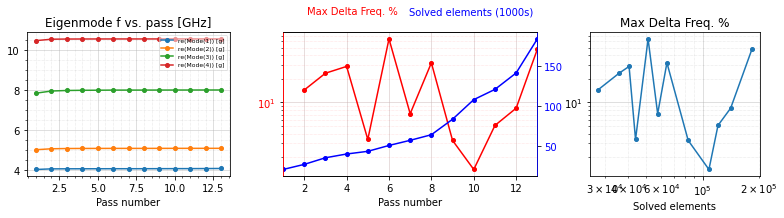

INFO 12:56PM [hfss_report_full_convergence]: Creating report for variation 1
INFO 12:56PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated 

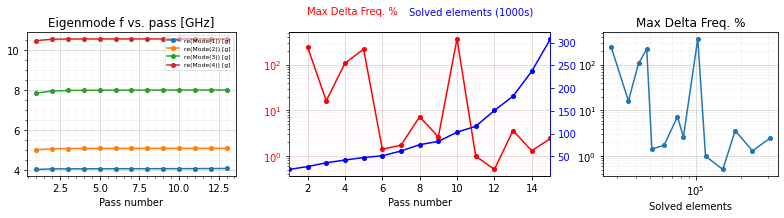

INFO 12:56PM [hfss_report_full_convergence]: Creating report for variation 2
INFO 12:57PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated 

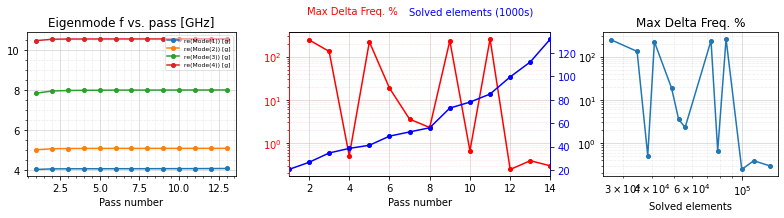

INFO 12:57PM [hfss_report_full_convergence]: Creating report for variation 3
INFO 12:57PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated 

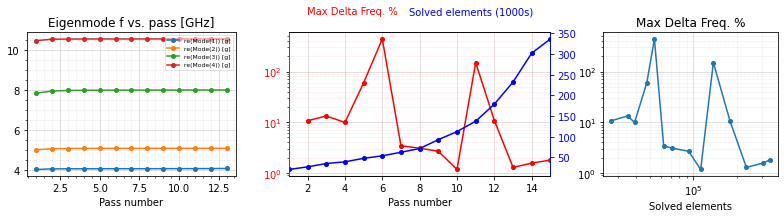

INFO 12:57PM [hfss_report_full_convergence]: Creating report for variation 4
INFO 12:57PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated 

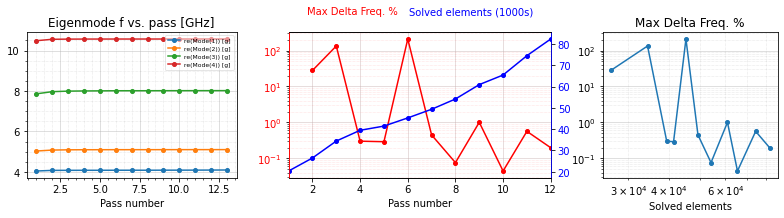

INFO 12:57PM [hfss_report_full_convergence]: Creating report for variation 5
INFO 12:57PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated 

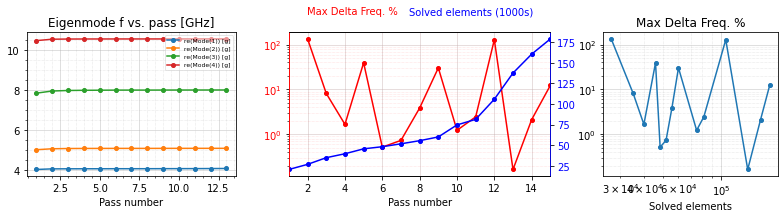

INFO 12:57PM [hfss_report_full_convergence]: Creating report for variation 6
INFO 12:58PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated 

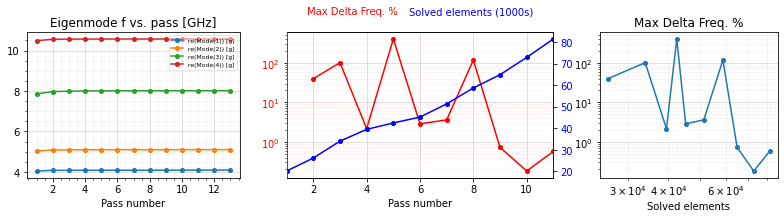

INFO 12:58PM [hfss_report_full_convergence]: Creating report for variation 7
INFO 12:58PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated 

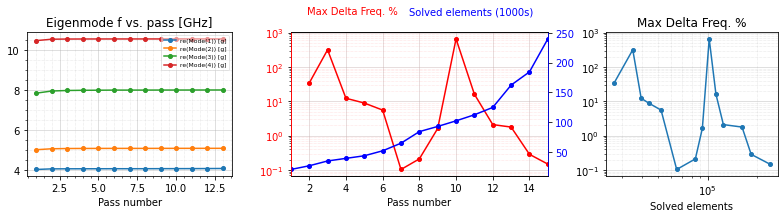

INFO 12:58PM [hfss_report_full_convergence]: Creating report for variation 8
INFO 12:58PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated 

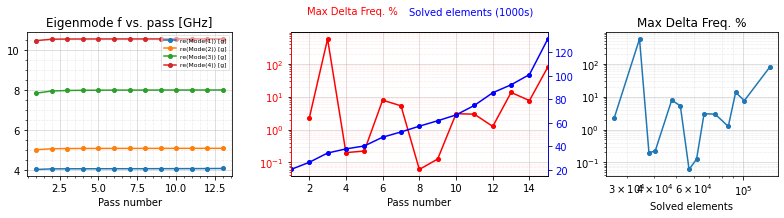

INFO 12:58PM [hfss_report_full_convergence]: Creating report for variation 9
INFO 12:58PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated 

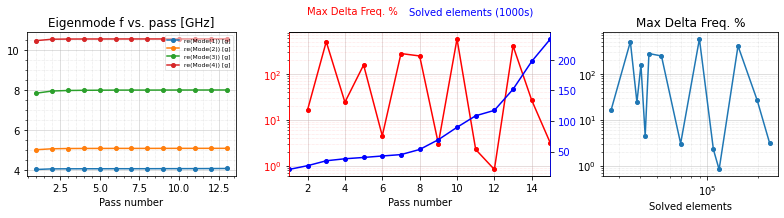

INFO 12:58PM [hfss_report_full_convergence]: Creating report for variation 10
INFO 12:58PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

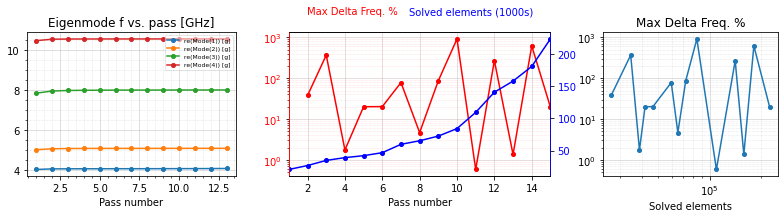

INFO 12:58PM [hfss_report_full_convergence]: Creating report for variation 11
INFO 12:59PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

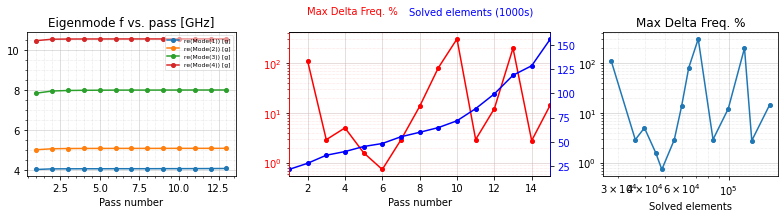

INFO 12:59PM [hfss_report_full_convergence]: Creating report for variation 12
INFO 12:59PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

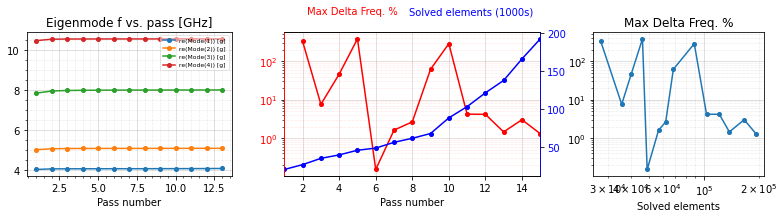

INFO 12:59PM [hfss_report_full_convergence]: Creating report for variation 13
INFO 12:59PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

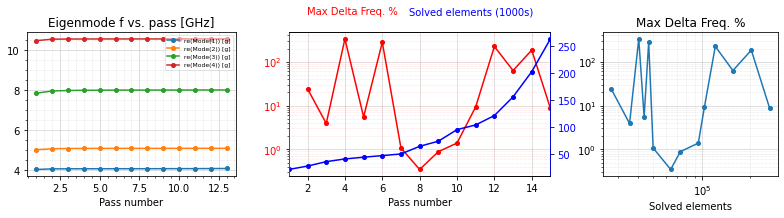

INFO 12:59PM [hfss_report_full_convergence]: Creating report for variation 14
INFO 12:59PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

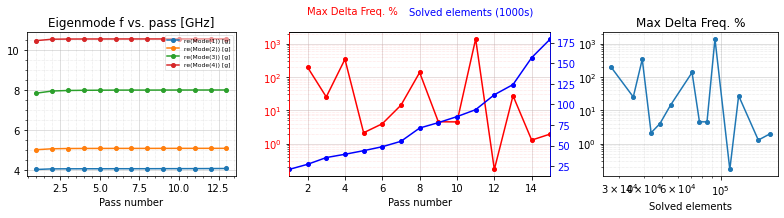

INFO 12:59PM [hfss_report_full_convergence]: Creating report for variation 15
INFO 12:59PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

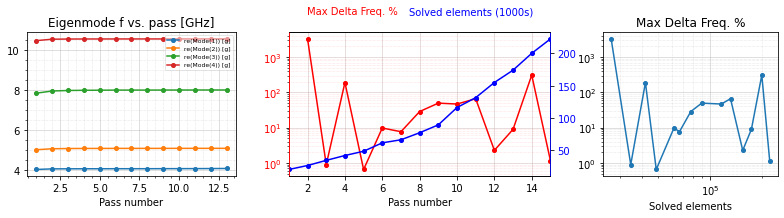

INFO 12:59PM [hfss_report_full_convergence]: Creating report for variation 16
INFO 01:00PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

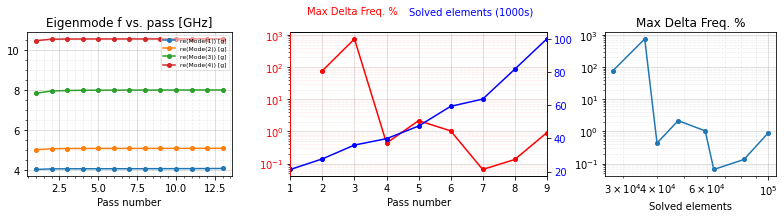

INFO 01:00PM [hfss_report_full_convergence]: Creating report for variation 17
INFO 01:00PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

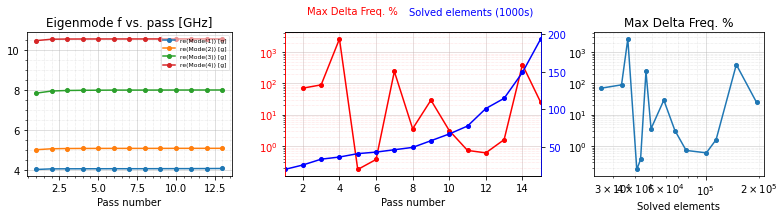

INFO 01:00PM [hfss_report_full_convergence]: Creating report for variation 18
INFO 01:00PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

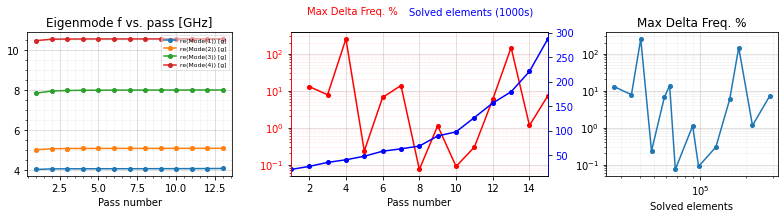

INFO 01:00PM [hfss_report_full_convergence]: Creating report for variation 19
INFO 01:00PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

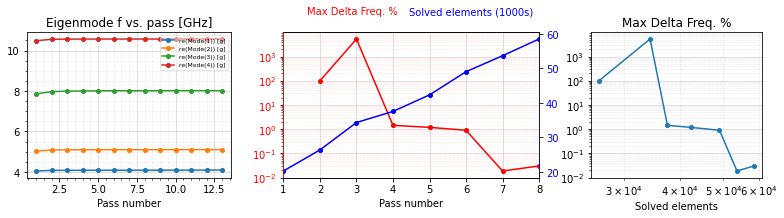

INFO 01:00PM [hfss_report_full_convergence]: Creating report for variation 20
INFO 01:01PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

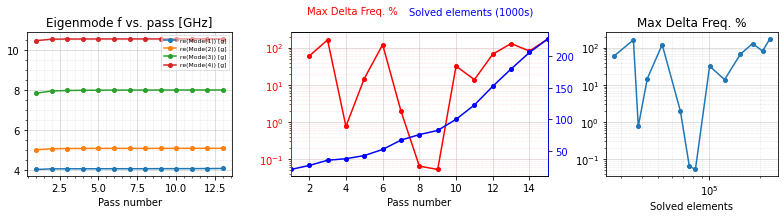

INFO 01:01PM [hfss_report_full_convergence]: Creating report for variation 21
INFO 01:01PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

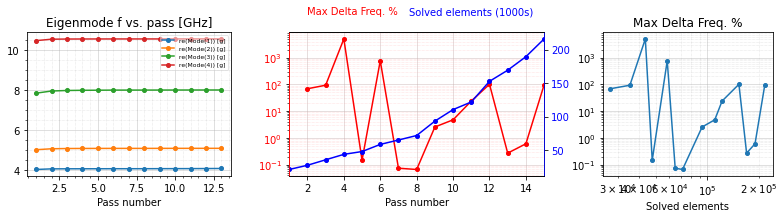

INFO 01:01PM [hfss_report_full_convergence]: Creating report for variation 22
INFO 01:01PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

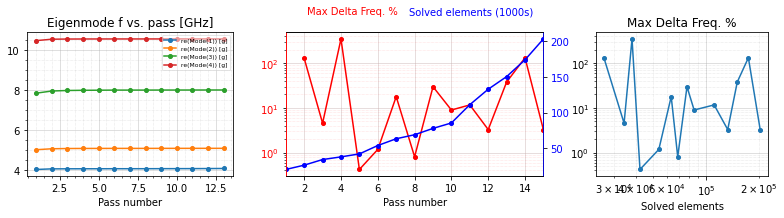

INFO 01:01PM [hfss_report_full_convergence]: Creating report for variation 23
INFO 01:01PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

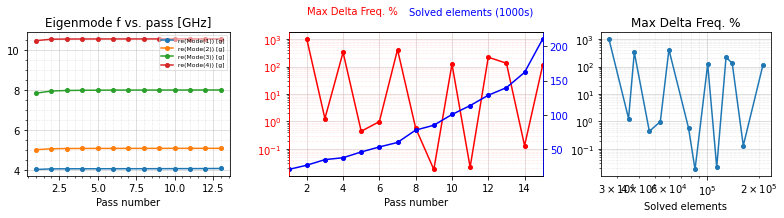

INFO 01:01PM [hfss_report_full_convergence]: Creating report for variation 24
INFO 01:01PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

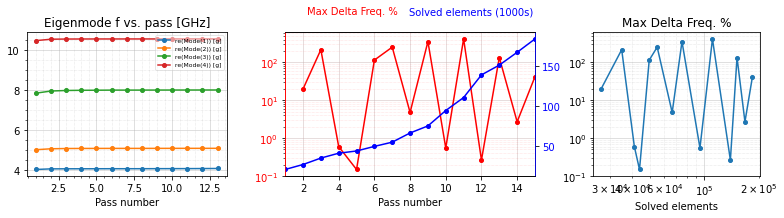

INFO 01:01PM [hfss_report_full_convergence]: Creating report for variation 25
INFO 01:02PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

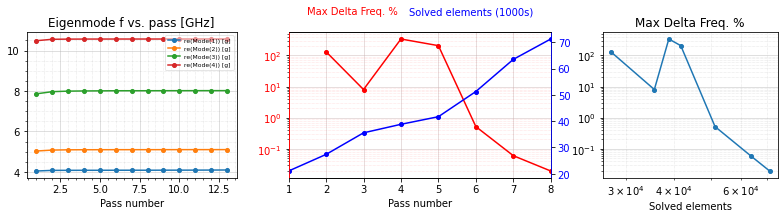

INFO 01:02PM [hfss_report_full_convergence]: Creating report for variation 26
INFO 01:02PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

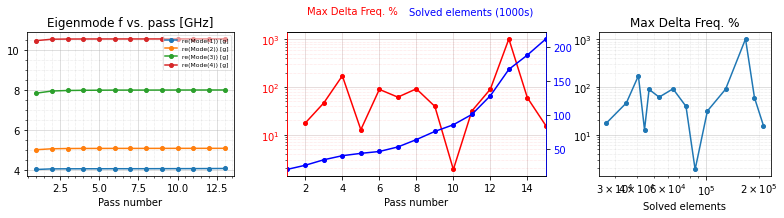

INFO 01:02PM [hfss_report_full_convergence]: Creating report for variation 27
INFO 01:02PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

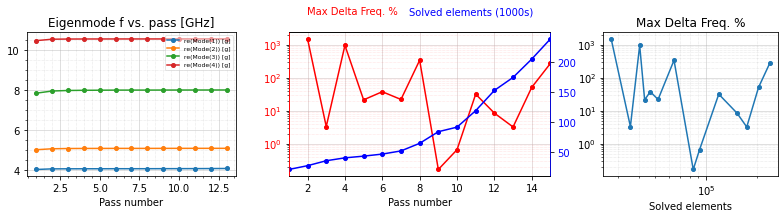

INFO 01:02PM [hfss_report_full_convergence]: Creating report for variation 28
INFO 01:02PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

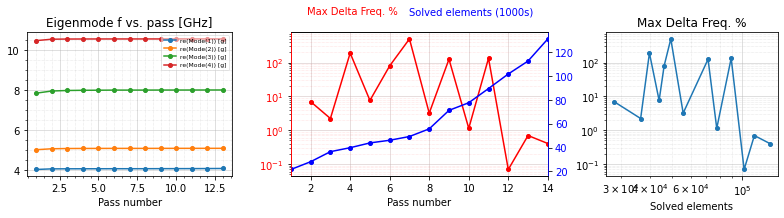

INFO 01:02PM [hfss_report_full_convergence]: Creating report for variation 29
INFO 01:02PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

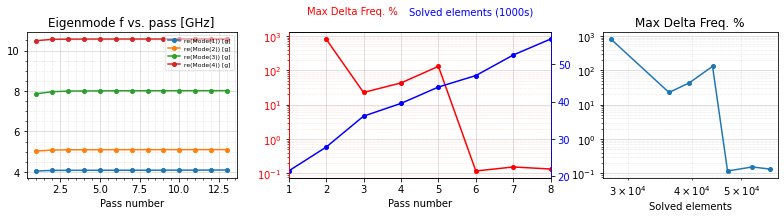

INFO 01:02PM [hfss_report_full_convergence]: Creating report for variation 30
INFO 01:03PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

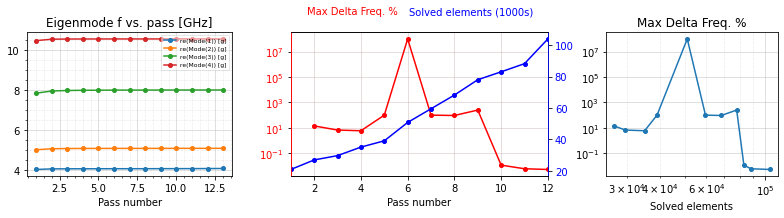

INFO 01:03PM [hfss_report_full_convergence]: Creating report for variation 31
INFO 01:03PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

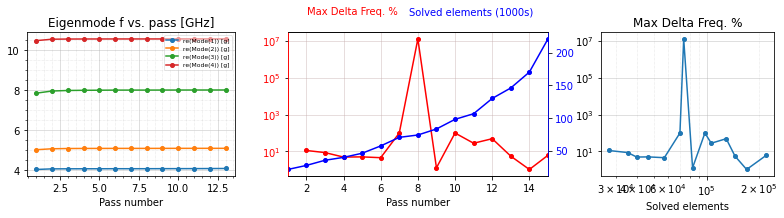

INFO 01:03PM [hfss_report_full_convergence]: Creating report for variation 32
INFO 01:03PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

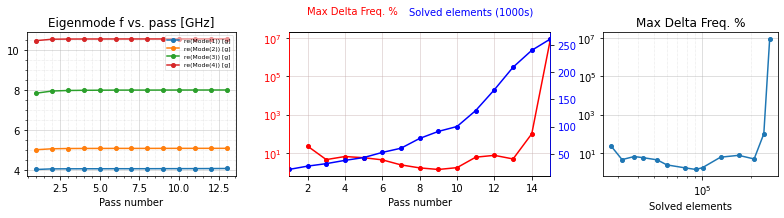

INFO 01:03PM [hfss_report_full_convergence]: Creating report for variation 33
INFO 01:03PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

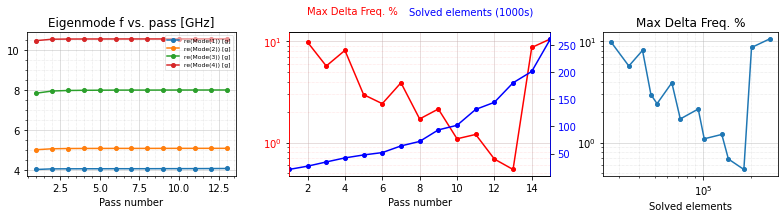

INFO 01:03PM [hfss_report_full_convergence]: Creating report for variation 34
INFO 01:04PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

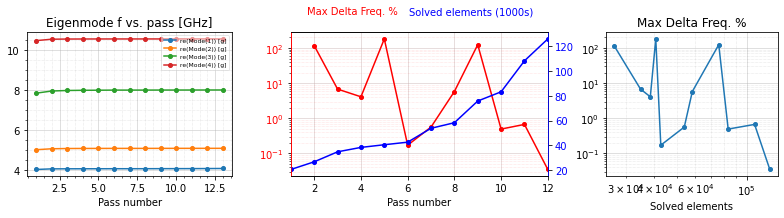

INFO 01:04PM [hfss_report_full_convergence]: Creating report for variation 35
INFO 01:04PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

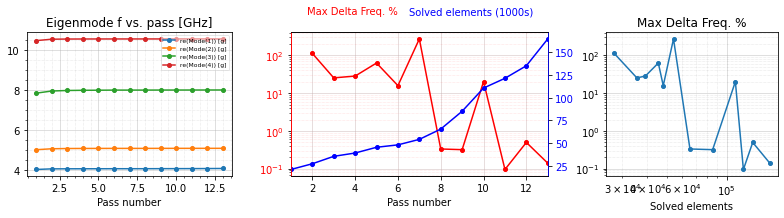

INFO 01:04PM [hfss_report_full_convergence]: Creating report for variation 36
INFO 01:04PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

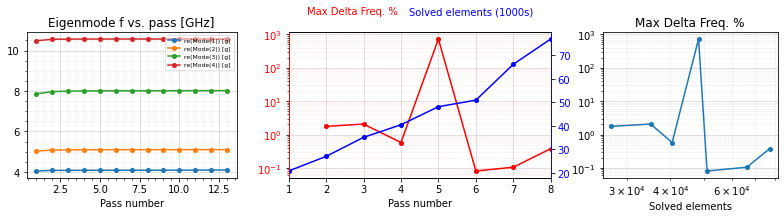

INFO 01:04PM [hfss_report_full_convergence]: Creating report for variation 37
INFO 01:04PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

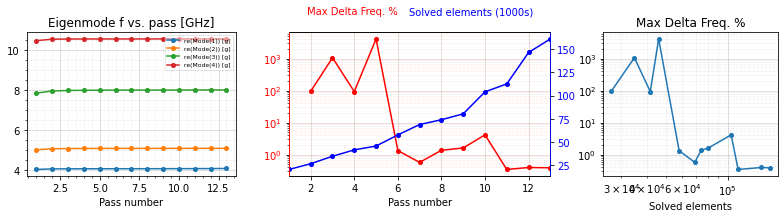

INFO 01:04PM [hfss_report_full_convergence]: Creating report for variation 38
INFO 01:04PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

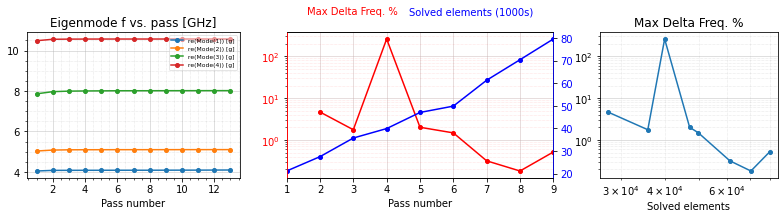

INFO 01:04PM [hfss_report_full_convergence]: Creating report for variation 39
INFO 01:05PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

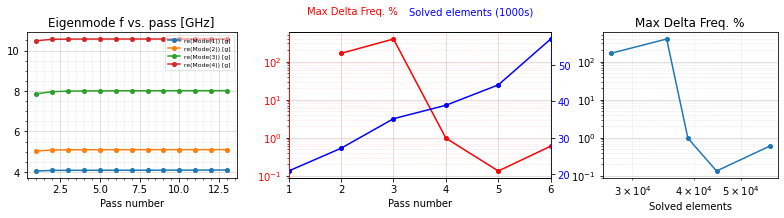

INFO 01:05PM [hfss_report_full_convergence]: Creating report for variation 40
INFO 01:05PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

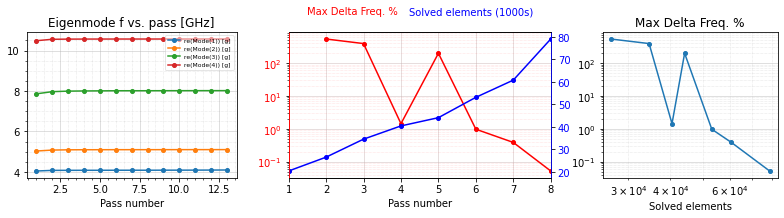

INFO 01:05PM [hfss_report_full_convergence]: Creating report for variation 41
INFO 01:05PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

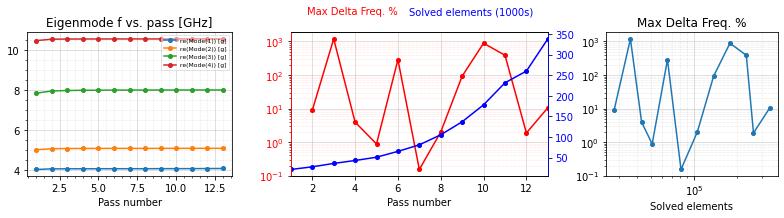

INFO 01:05PM [hfss_report_full_convergence]: Creating report for variation 42
INFO 01:05PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

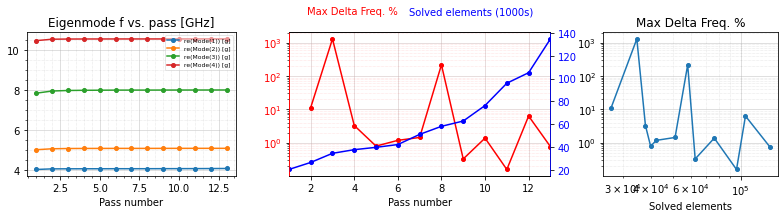

INFO 01:05PM [hfss_report_full_convergence]: Creating report for variation 43
INFO 01:05PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

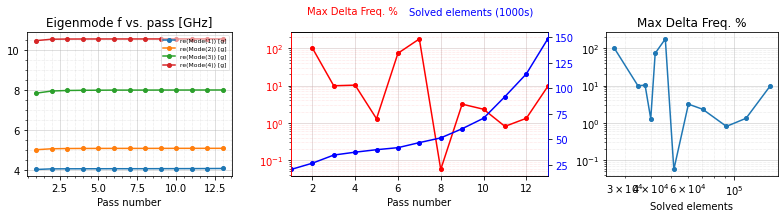

INFO 01:05PM [hfss_report_full_convergence]: Creating report for variation 44
INFO 01:06PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

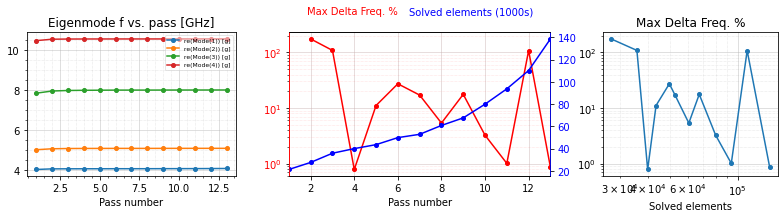

INFO 01:06PM [hfss_report_full_convergence]: Creating report for variation 45
INFO 01:06PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

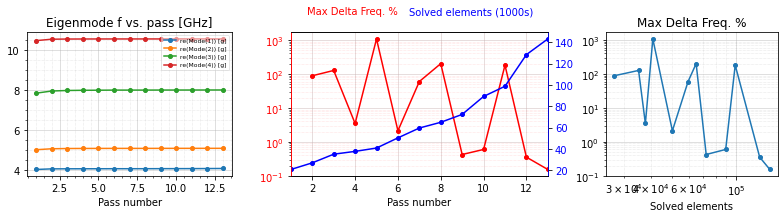

INFO 01:06PM [hfss_report_full_convergence]: Creating report for variation 46
INFO 01:06PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

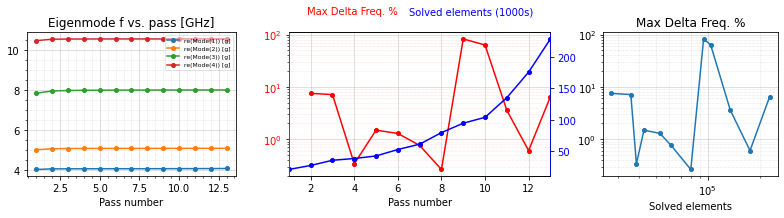

INFO 01:06PM [hfss_report_full_convergence]: Creating report for variation 47
INFO 01:06PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

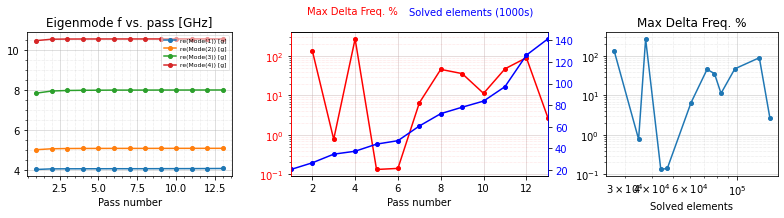

INFO 01:06PM [hfss_report_full_convergence]: Creating report for variation 48
INFO 01:07PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

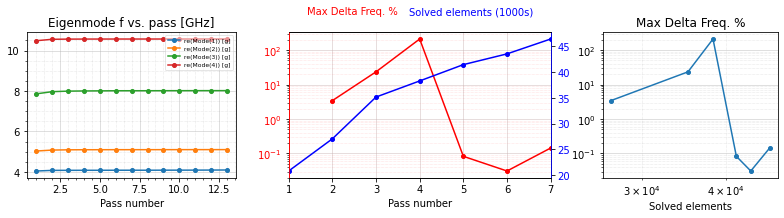

INFO 01:07PM [hfss_report_full_convergence]: Creating report for variation 49
INFO 01:07PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

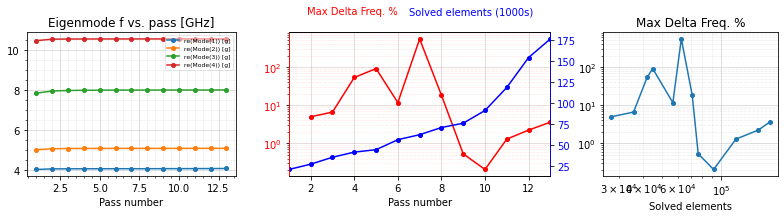

INFO 01:07PM [hfss_report_full_convergence]: Creating report for variation 50
INFO 01:07PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

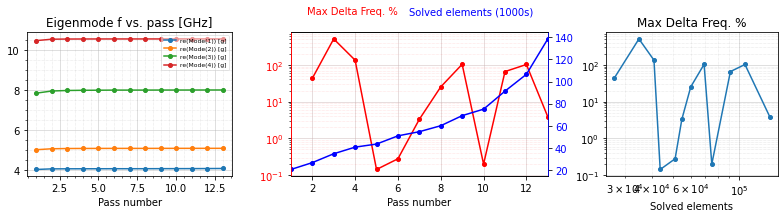

INFO 01:07PM [hfss_report_full_convergence]: Creating report for variation 51
INFO 01:07PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

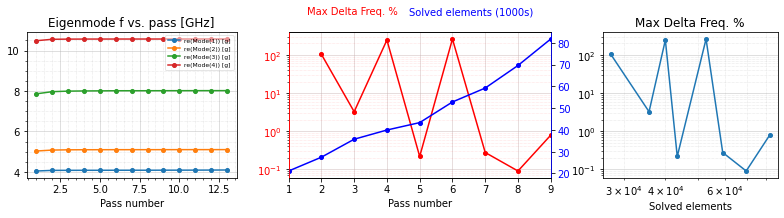

INFO 01:07PM [hfss_report_full_convergence]: Creating report for variation 52
INFO 01:07PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

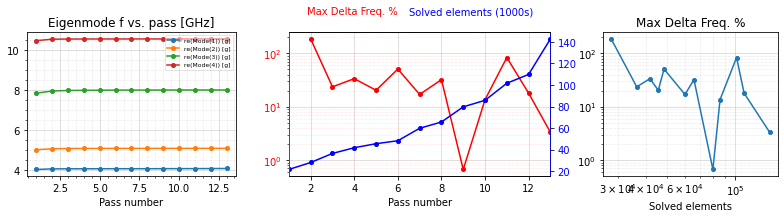

INFO 01:07PM [hfss_report_full_convergence]: Creating report for variation 53
INFO 01:08PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

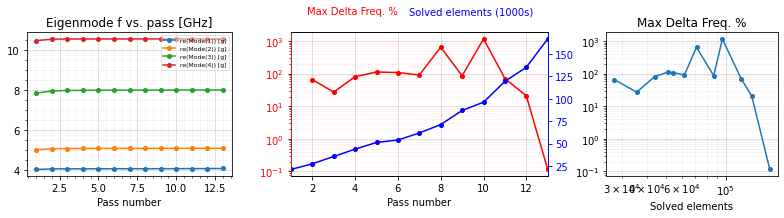

INFO 01:08PM [hfss_report_full_convergence]: Creating report for variation 54
INFO 01:08PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

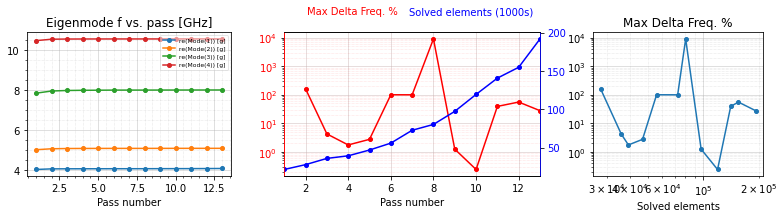

INFO 01:08PM [hfss_report_full_convergence]: Creating report for variation 55
INFO 01:08PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

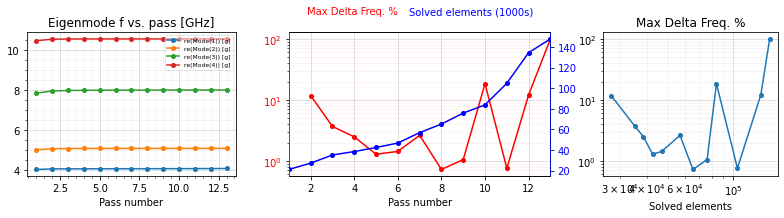

INFO 01:08PM [hfss_report_full_convergence]: Creating report for variation 56
INFO 01:08PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

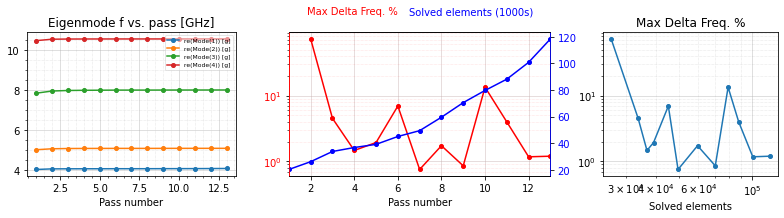

INFO 01:08PM [hfss_report_full_convergence]: Creating report for variation 57
INFO 01:09PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

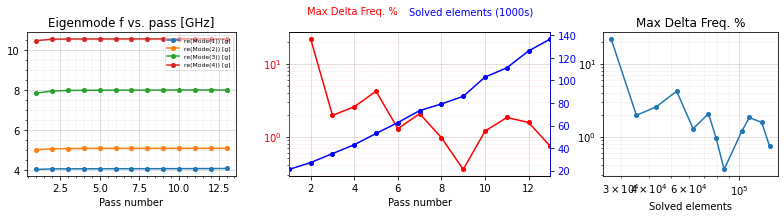

INFO 01:09PM [hfss_report_full_convergence]: Creating report for variation 58
INFO 01:09PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

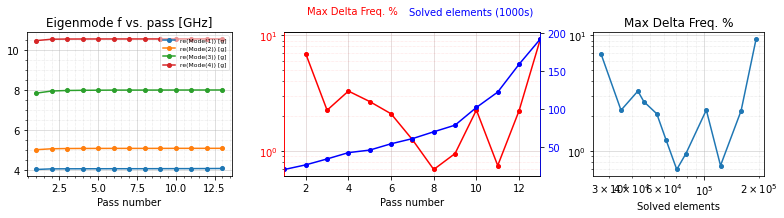

INFO 01:09PM [hfss_report_full_convergence]: Creating report for variation 59
INFO 01:09PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

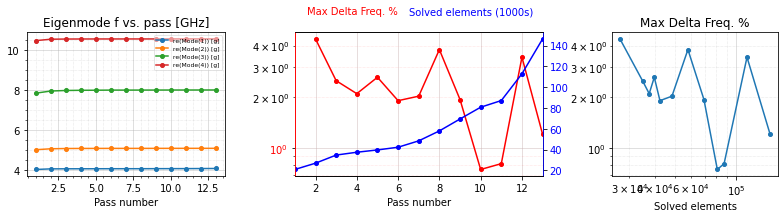

INFO 01:09PM [hfss_report_full_convergence]: Creating report for variation 60
INFO 01:09PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

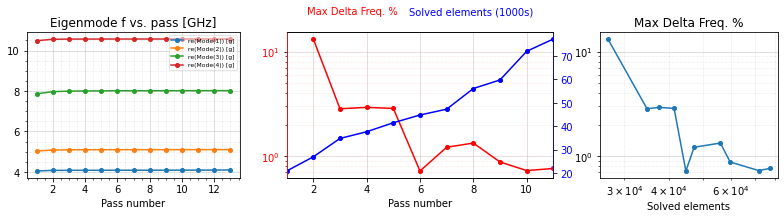

INFO 01:09PM [hfss_report_full_convergence]: Creating report for variation 61
INFO 01:09PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

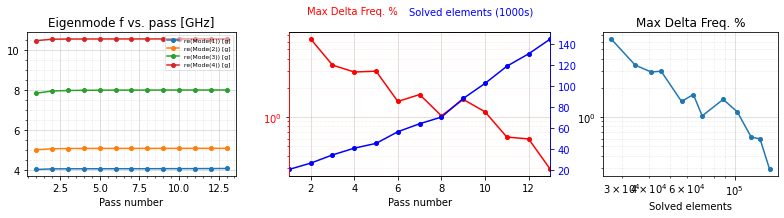

INFO 01:09PM [hfss_report_full_convergence]: Creating report for variation 62
INFO 01:10PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

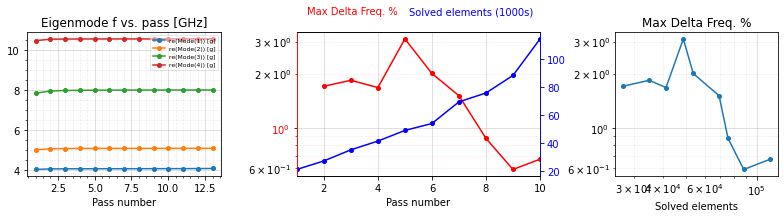

INFO 01:10PM [hfss_report_full_convergence]: Creating report for variation 63
INFO 01:10PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

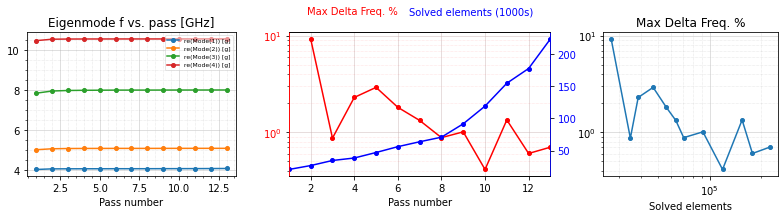

INFO 01:10PM [hfss_report_full_convergence]: Creating report for variation 64
INFO 01:10PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

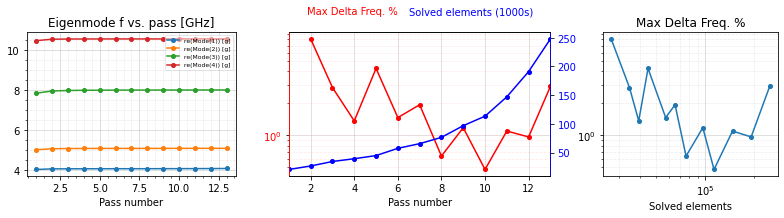

INFO 01:10PM [hfss_report_full_convergence]: Creating report for variation 65
INFO 01:10PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

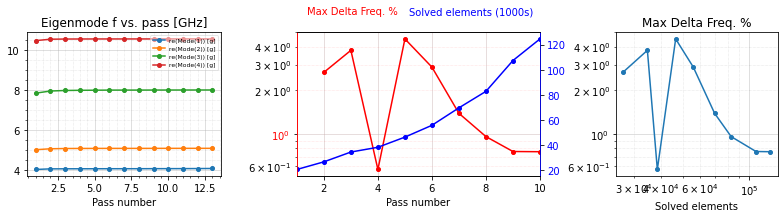

INFO 01:10PM [hfss_report_full_convergence]: Creating report for variation 66
INFO 01:10PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

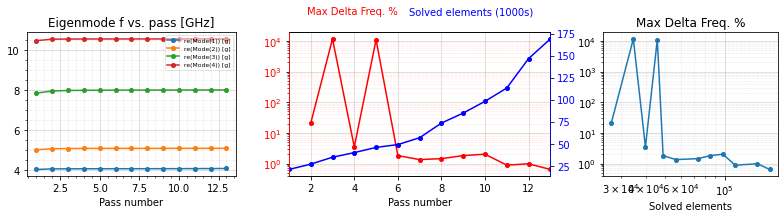

INFO 01:10PM [hfss_report_full_convergence]: Creating report for variation 67
INFO 01:11PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

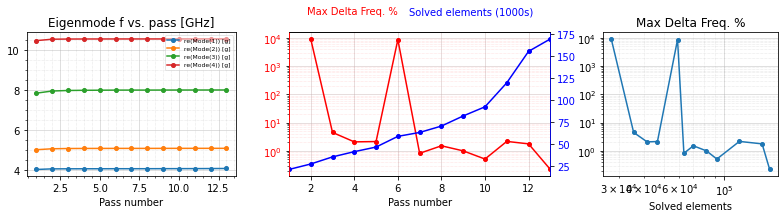

INFO 01:11PM [hfss_report_full_convergence]: Creating report for variation 68
INFO 01:11PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

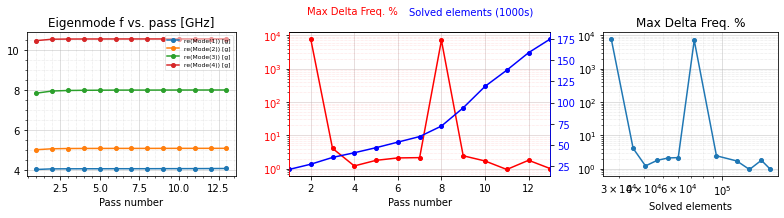

INFO 01:11PM [hfss_report_full_convergence]: Creating report for variation 69
INFO 01:11PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

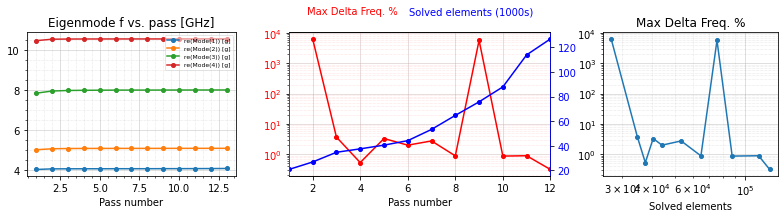

INFO 01:11PM [hfss_report_full_convergence]: Creating report for variation 70
INFO 01:11PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

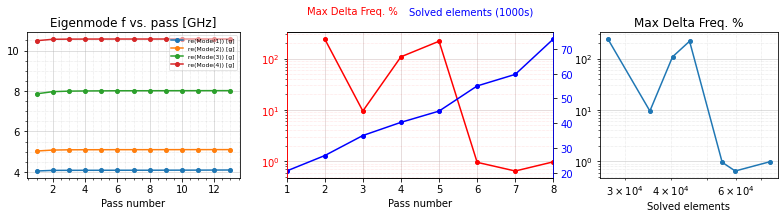

INFO 01:11PM [hfss_report_full_convergence]: Creating report for variation 71
INFO 01:12PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

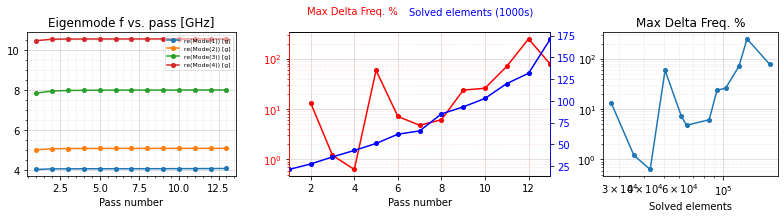

INFO 01:12PM [hfss_report_full_convergence]: Creating report for variation 72
INFO 01:12PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

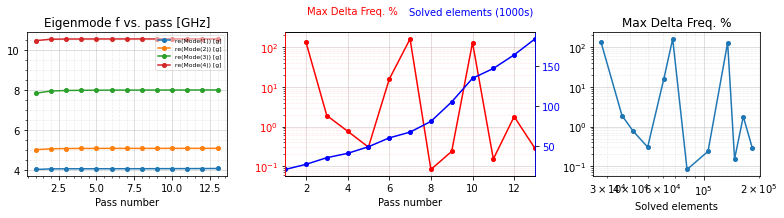

INFO 01:12PM [hfss_report_full_convergence]: Creating report for variation 73
INFO 01:12PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

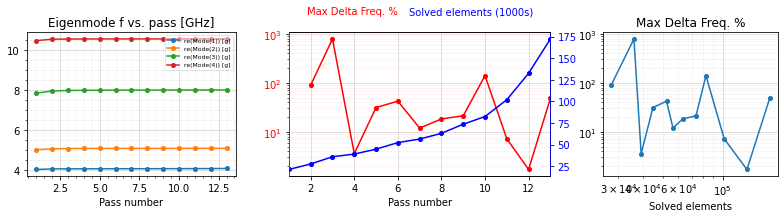

INFO 01:12PM [hfss_report_full_convergence]: Creating report for variation 74
INFO 01:12PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

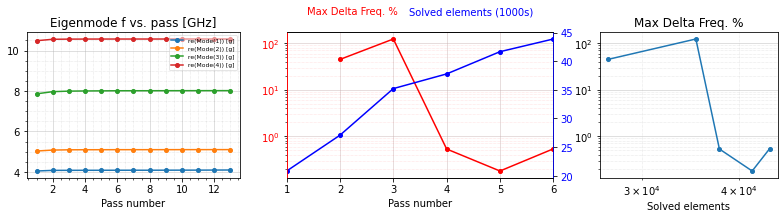

INFO 01:12PM [hfss_report_full_convergence]: Creating report for variation 75
INFO 01:12PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

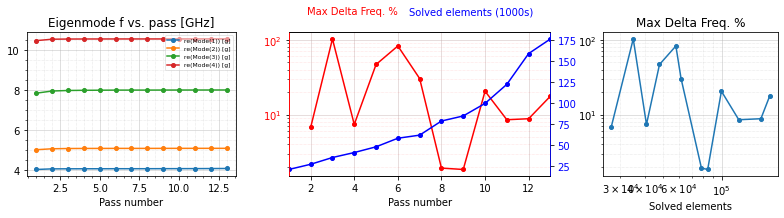

INFO 01:12PM [hfss_report_full_convergence]: Creating report for variation 76
INFO 01:13PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

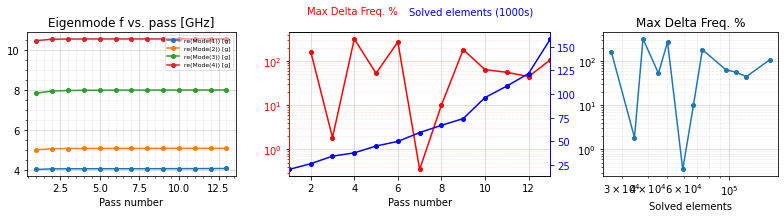

INFO 01:13PM [hfss_report_full_convergence]: Creating report for variation 77
INFO 01:13PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

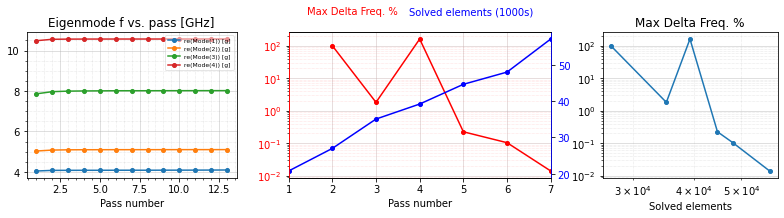

INFO 01:13PM [hfss_report_full_convergence]: Creating report for variation 78
INFO 01:13PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

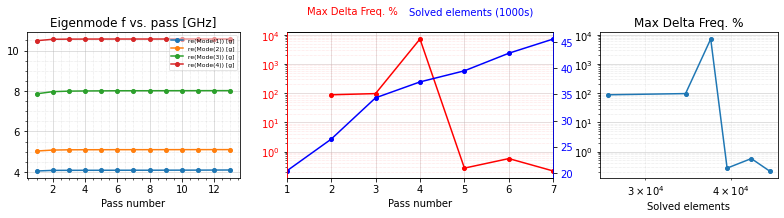

INFO 01:13PM [hfss_report_full_convergence]: Creating report for variation 79
INFO 01:13PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

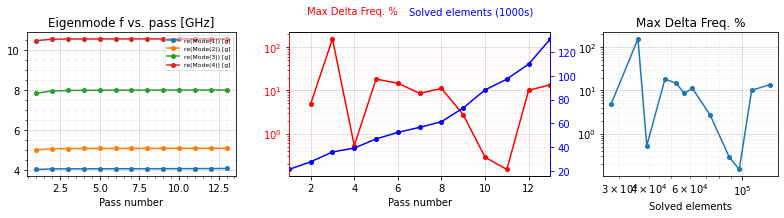

INFO 01:13PM [hfss_report_full_convergence]: Creating report for variation 80
INFO 01:14PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

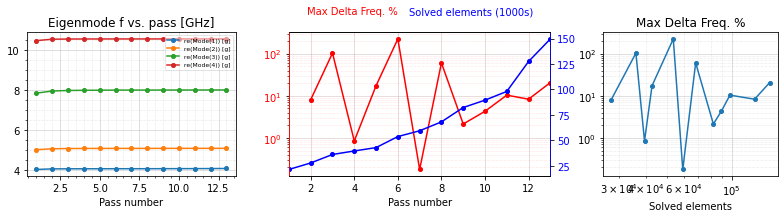

INFO 01:14PM [hfss_report_full_convergence]: Creating report for variation 81
INFO 01:14PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

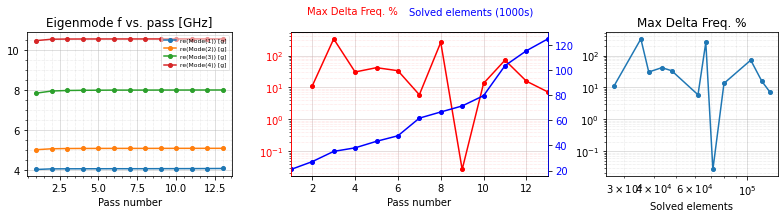

INFO 01:14PM [hfss_report_full_convergence]: Creating report for variation 82
INFO 01:14PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

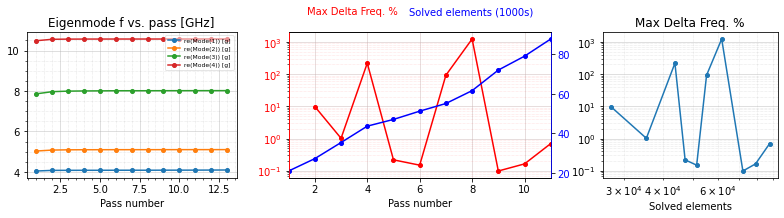

INFO 01:14PM [hfss_report_full_convergence]: Creating report for variation 83
INFO 01:14PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

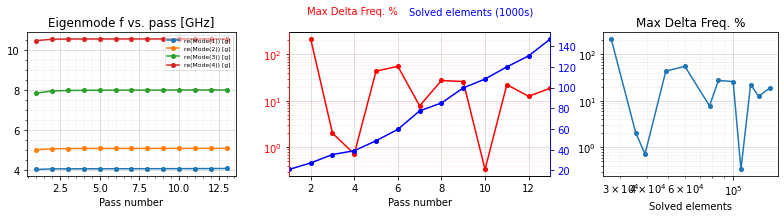

INFO 01:14PM [hfss_report_full_convergence]: Creating report for variation 84
INFO 01:14PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

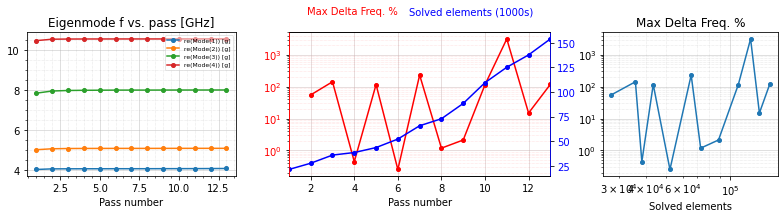

INFO 01:14PM [hfss_report_full_convergence]: Creating report for variation 85
INFO 01:15PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

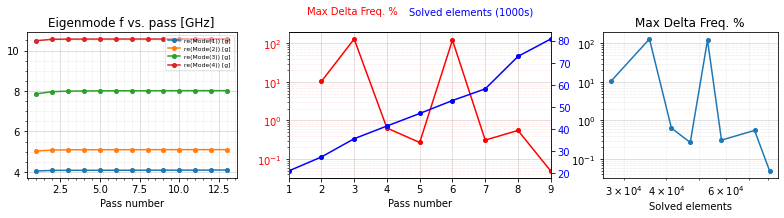

INFO 01:15PM [hfss_report_full_convergence]: Creating report for variation 86
INFO 01:15PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

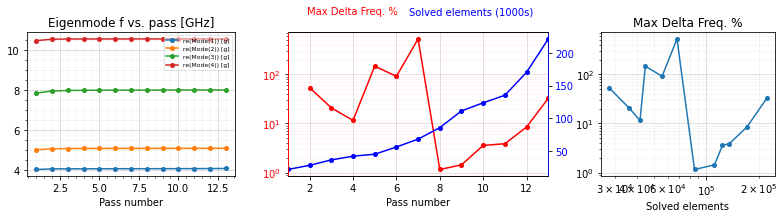

INFO 01:15PM [hfss_report_full_convergence]: Creating report for variation 87
INFO 01:15PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

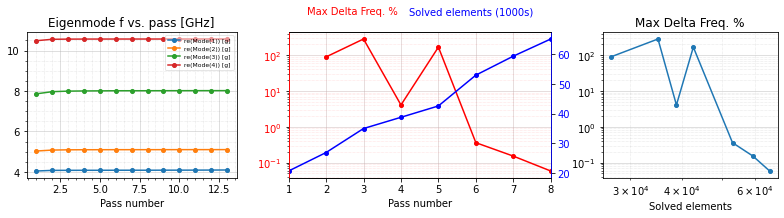

INFO 01:15PM [hfss_report_full_convergence]: Creating report for variation 88
INFO 01:15PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

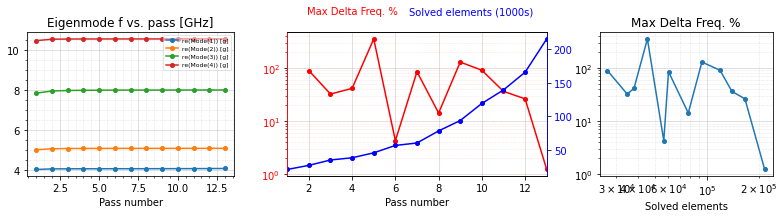

INFO 01:15PM [hfss_report_full_convergence]: Creating report for variation 89
INFO 01:15PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

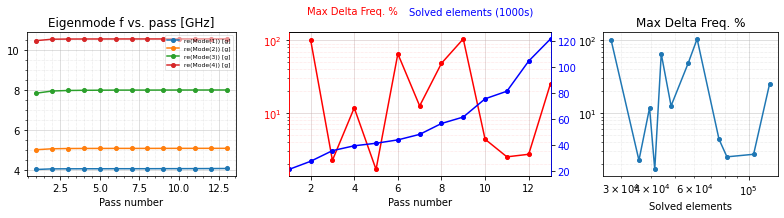

INFO 01:15PM [hfss_report_full_convergence]: Creating report for variation 90
INFO 01:16PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

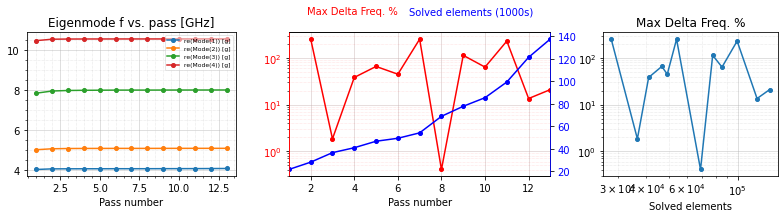

INFO 01:16PM [hfss_report_full_convergence]: Creating report for variation 91
INFO 01:16PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

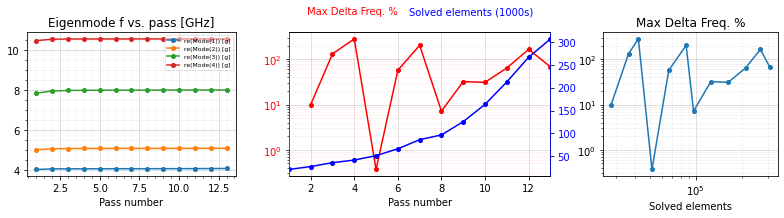

INFO 01:16PM [hfss_report_full_convergence]: Creating report for variation 92
INFO 01:16PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

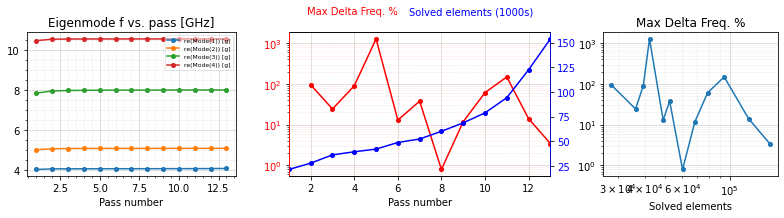

INFO 01:16PM [hfss_report_full_convergence]: Creating report for variation 93
INFO 01:16PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

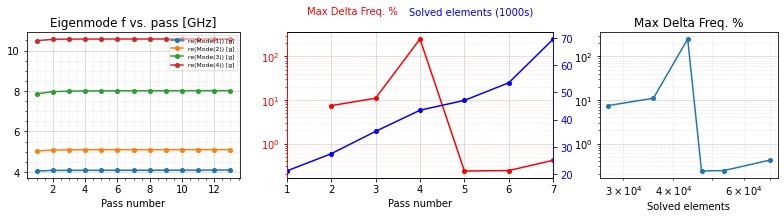

INFO 01:16PM [hfss_report_full_convergence]: Creating report for variation 94
INFO 01:17PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

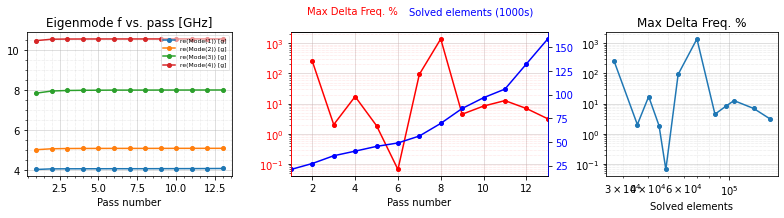

INFO 01:17PM [hfss_report_full_convergence]: Creating report for variation 95
INFO 01:17PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

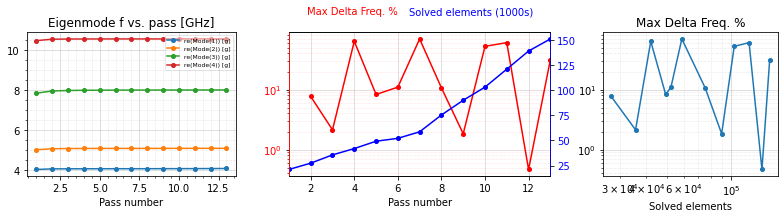

INFO 01:17PM [hfss_report_full_convergence]: Creating report for variation 96
INFO 01:17PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

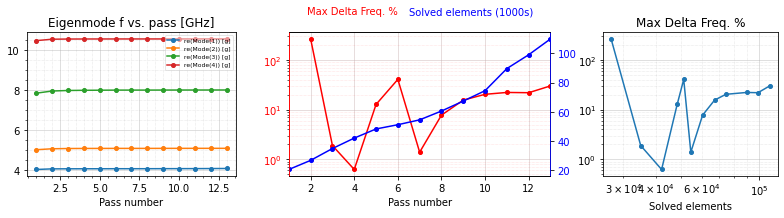

INFO 01:17PM [hfss_report_full_convergence]: Creating report for variation 97
INFO 01:17PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

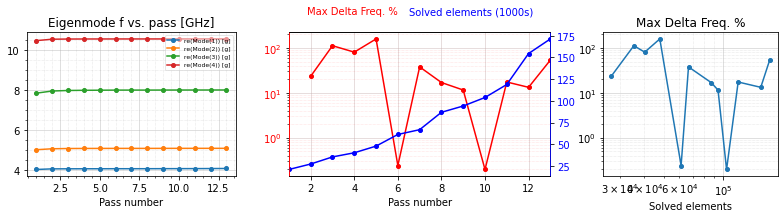

INFO 01:17PM [hfss_report_full_convergence]: Creating report for variation 98
INFO 01:17PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

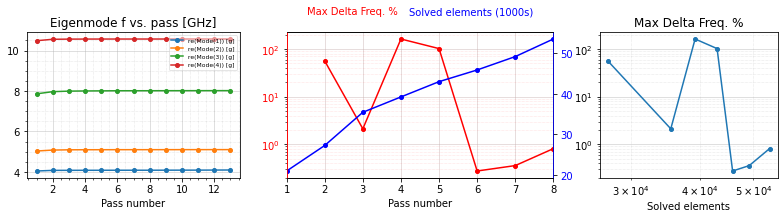

INFO 01:17PM [hfss_report_full_convergence]: Creating report for variation 99
INFO 01:18PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated

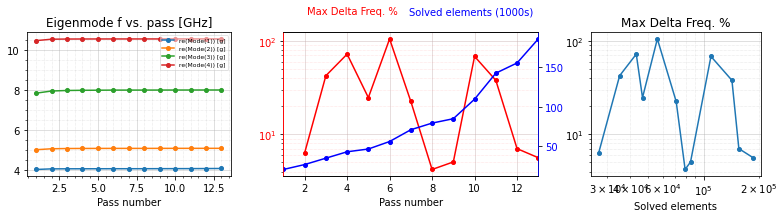

INFO 01:18PM [hfss_report_full_convergence]: Creating report for variation 100
INFO 01:18PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecate

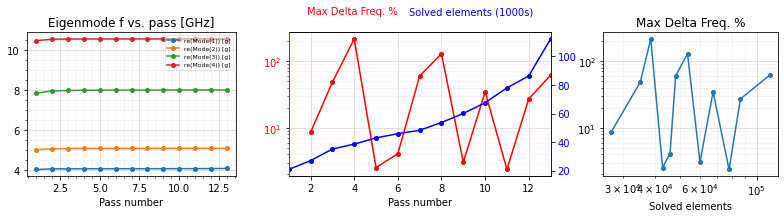

INFO 01:18PM [hfss_report_full_convergence]: Creating report for variation 101
INFO 01:18PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecate

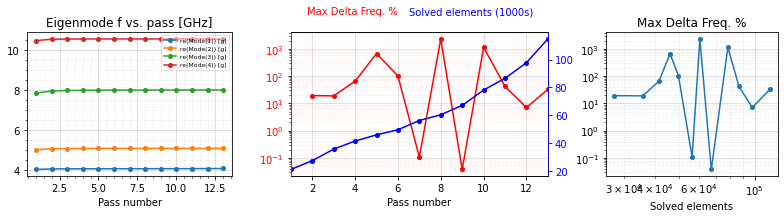

INFO 01:18PM [hfss_report_full_convergence]: Creating report for variation 102
INFO 01:18PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecate

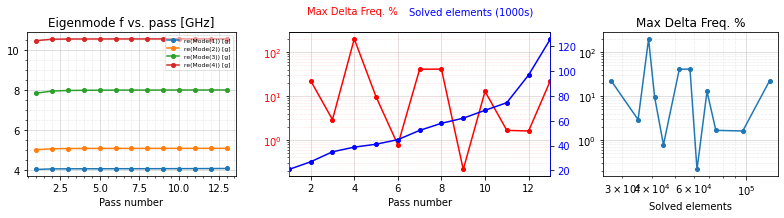

INFO 01:18PM [hfss_report_full_convergence]: Creating report for variation 103
INFO 01:18PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecate

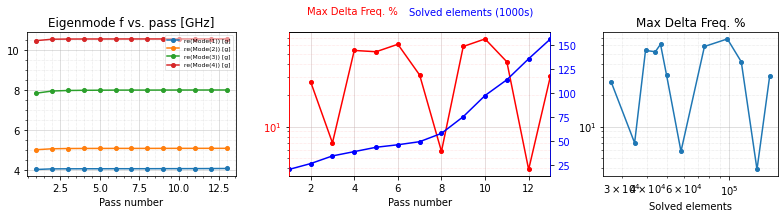

INFO 01:18PM [hfss_report_full_convergence]: Creating report for variation 104
INFO 01:19PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecate

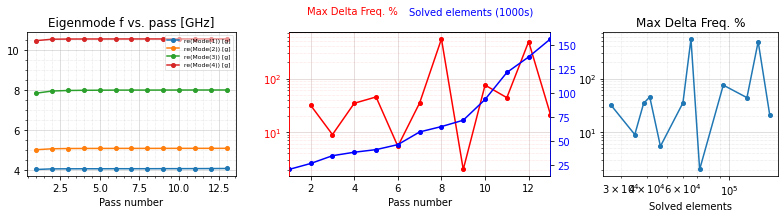

INFO 01:19PM [hfss_report_full_convergence]: Creating report for variation 105
INFO 01:19PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecate

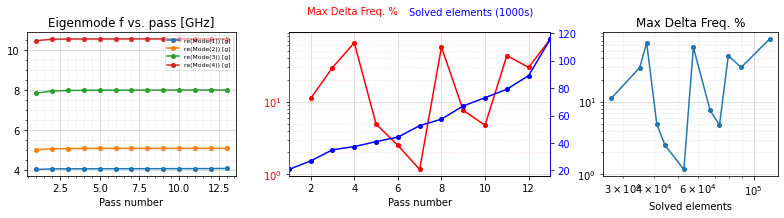

INFO 01:19PM [hfss_report_full_convergence]: Creating report for variation 106
INFO 01:19PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecate

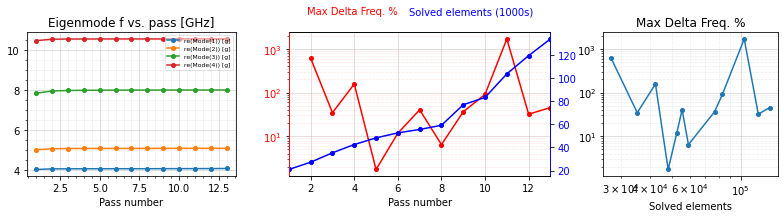

INFO 01:19PM [hfss_report_full_convergence]: Creating report for variation 107
INFO 01:19PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecate

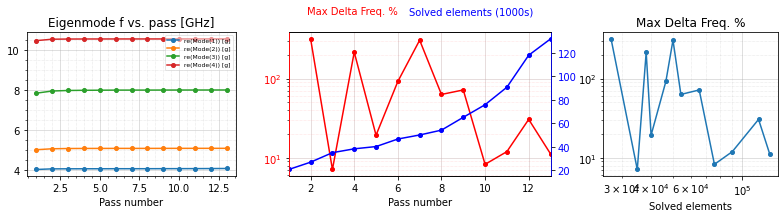

INFO 01:19PM [hfss_report_full_convergence]: Creating report for variation 108
INFO 01:20PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecate

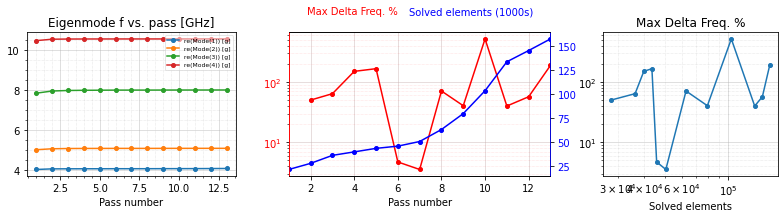

INFO 01:20PM [hfss_report_full_convergence]: Creating report for variation 109
INFO 01:20PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecate

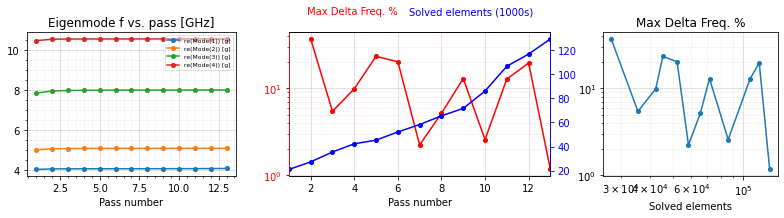

INFO 01:20PM [hfss_report_full_convergence]: Creating report for variation 110
INFO 01:20PM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen7\hfss_eig_f_convergence.csv
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Public\miniconda3\envs\virenv\lib\site-packages\pandas\plotting\_tools.py:334: MatplotlibDeprecationWarning: 
The is_first_col function was deprecate

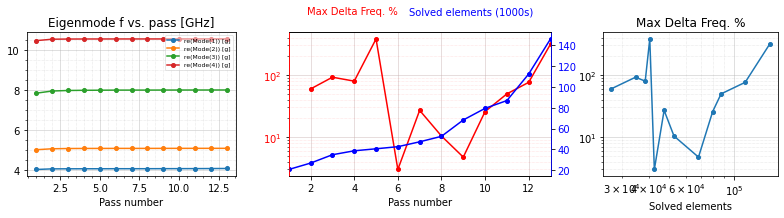

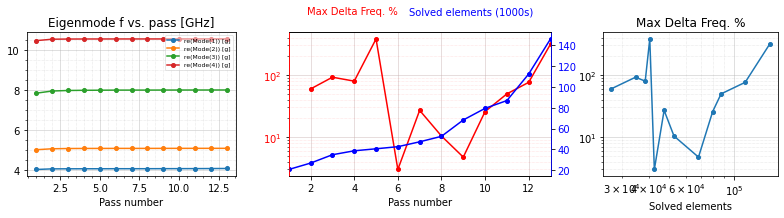

In [12]:
eprh.hfss_report_full_convergence();

We can see that the convergence wasn't actually terrific, though we only used 60,000 tets. However, there seems to be a divergence above 15 passes in this example. We will probably need to change our mesh operations to create a monotonic convergence.

However, for the purpose of the tutorial, let us press forward. 

You can use these autogenerated reports to keep track of your simulations.
This is still all at the clasical level. Take a look at the other methods, including
 * `hfss_report_full_convergence`
 * `hfss_report_f_convergence`
 * `get_convergence`
 * `get_mesh_statistics`
 * `get_freqs_bare_pd`
 * ...
 
For example, you can get tables of the freqs and Qs using 
```python
Fs, Qs = eprh.get_freqs_bare_pd(variation='0')
```

In [14]:
import pandas as pd
F, Q = [],[]
for variation in eprh.variations: # just for the first 2
#     if int(float(eprh.get_variables(str(variation))['_pin1Len'].split('m')[0]))==8:
        Ft, Qt = eprh.get_freqs_bare_pd(variation=variation, frame=False)
        F.append(Ft)
        Q.append(Qt)

In [24]:
def Sorting(x,y):
    ind = np.lexsort((y,x))
    x = x[ind]
    y = y[ind]
    return x, y

In [ ]:
x = np.array(ROpin2)-offset
y = np.array(Fs[:,2]/Qs[:,2]*10**6) # kHz
y = y-min(y)
target = 1000 #kHz

x, y = Sorting(x,y)

spl = InterpolatedUnivariateSpline(x,y)
xs = np.linspace(min(x), max(x), 1000)


plt.plot(x,y,'k.', label = 'Data')
plt.plot(xs, spl(xs), label = 'Spline')
plt.legend()


ys = spl(xs)
ind = np.argmin((ys - 1.00)**2)
xbest = xs[ind]

spl2 = UnivariateSpline(x, y - target, s=0)
xbest = spl2.roots()[-1]
plt.axvline(xbest)
plt.axhline(spl(xbest))

plt.xlabel('RO pin depth (mm)- %s mm'% offset,fontsize = fontsize)
plt.ylabel(r'$\kappa_{ro} (kHz)$',fontsize=fontsize)
print(xbest)
plt.yscale('log')
plt.show()

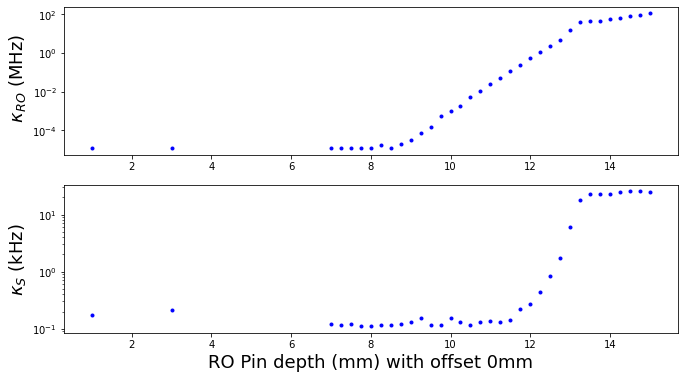

In [22]:
ind = np.logical_and(RO2==1,Storage==6)

Fs = np.array(F)[ind]
Qs = np.array(Q)[ind]

variable = RO1[ind]
offset = 0

fontsize=18
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11,6))
ax1.plot(np.array(variable)-offset,Fs[:,2]*1e3/Qs[:,2],'b.')
ax1.set_ylabel(r' $\kappa_{RO}$ (MHz)',fontsize= fontsize)
ax1.set_yscale('log')
ax2.plot(np.array(variable)-offset,Fs[:,1]*1e6/Qs[:,1],'b.')
ax2.set_ylabel(r'$\kappa_S$ (kHz)',fontsize= fontsize)
ax2.set_yscale('log')
plt.xlabel('RO Pin depth (mm) with offset '+str(offset)+'mm',fontsize= fontsize)
plt.show()

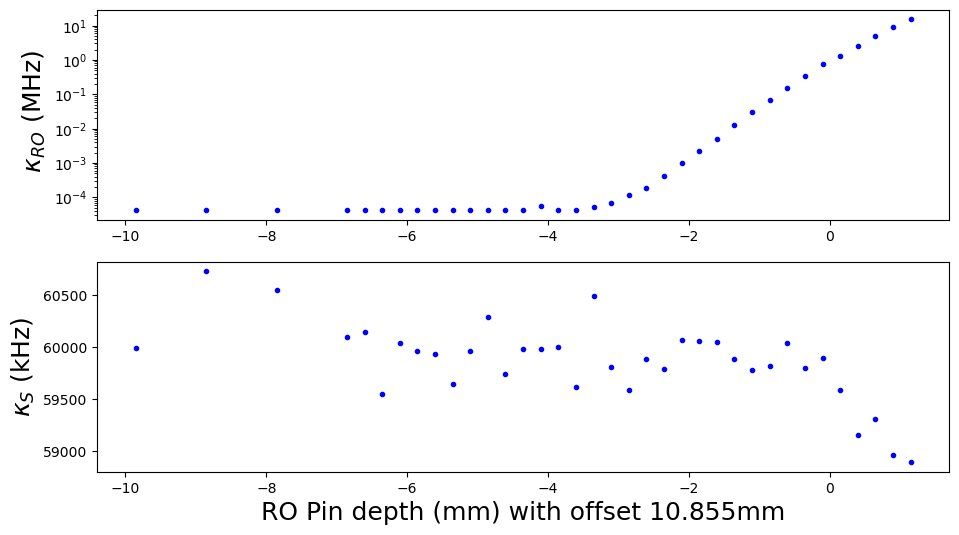

In [24]:
Fs = np.array(Fs)
Qs = np.array(Qs)

variable = ROpin2
offset = 10.855

fontsize=18
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11,6))
ax1.plot(np.array(variable)-offset,Fs[:,2]*1e3/Qs[:,2],'b.')
ax1.set_ylabel(r' $\kappa_{RO}$ (MHz)',fontsize= fontsize)
ax1.set_yscale('log')
ax2.plot(np.array(variable)-offset,Fs[:,1]*1e6/Qs[:,1],'b.')
ax2.set_ylabel(r'$\kappa_S$ (kHz)',fontsize= fontsize)
plt.xlabel('RO Pin depth (mm) with offset '+str(offset)+'mm',fontsize= fontsize)
plt.show()

0.02237832885152463


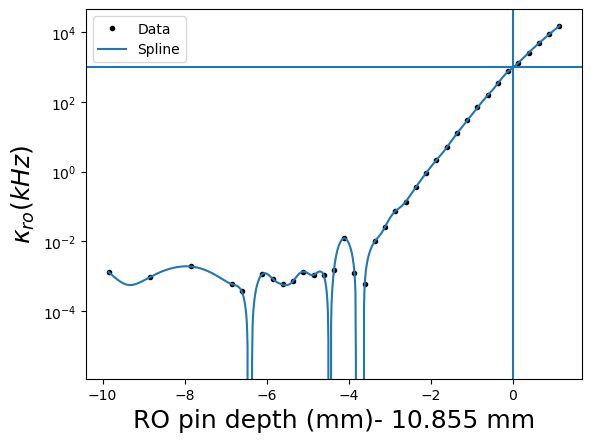

In [32]:
from scipy.interpolate import InterpolatedUnivariateSpline, UnivariateSpline

x = np.array(ROpin2)-offset
y = np.array(Fs[:,2]/Qs[:,2]*10**6) # kHz
y = y-min(y)
target = 1000 #kHz

ind = np.lexsort((y,x))
x = x[ind]
y = y[ind]

spl = InterpolatedUnivariateSpline(x,y)
xs = np.linspace(min(x), max(x), 1000)


plt.plot(x,y,'k.', label = 'Data')
plt.plot(xs, spl(xs), label = 'Spline')
plt.legend()


ys = spl(xs)
ind = np.argmin((ys - 1.00)**2)
xbest = xs[ind]

spl2 = UnivariateSpline(x, y - target, s=0)
xbest = spl2.roots()[-1]
plt.axvline(xbest)
plt.axhline(spl(xbest))

plt.xlabel('RO pin depth (mm)- %s mm'% offset,fontsize = fontsize)
plt.ylabel(r'$\kappa_{ro} (kHz)$',fontsize=fontsize)
print(xbest)
plt.yscale('log')
plt.show()

In [54]:
Mode = 1
Variable = np.array(Storage)

offset = 0
ROpin1, ROpin2 = np.array(ROpin1), np.array(ROpin2)
target = 0.01 # MHz

Fs, Qs = [],[]
for variation in eprh.variations: # just for the first 2
#     if int(float(eprh.get_variables(str(variation))['_pin1Len'].split('m')[0]))==8:
    Ft, Qt = eprh.get_freqs_bare_pd(variation=variation, frame=False)
    print(Ft, Qt)
    Fs.append(Ft)
    Qs.append(Qt)
        
        
logic = np.logical_and(ROpin1==1,ROpin2==10.88)
F2 = np.array(Fs)[:,Mode][logic]
Q2 = np.array(Qs)[:,Mode][logic]
Variable = Variable[logic]

0     4.102693
1     4.837287
2     8.038637
3    10.651719
dtype: float64 0    3.987335e+04
1    8.110471e+01
2    1.882012e+08
3    2.358791e+06
dtype: float64
0     4.084251
1     4.834715
2     8.037417
3    10.651416
dtype: float64 0    4.224761e+04
1    8.062598e+01
2    1.854109e+08
3    1.035540e+07
dtype: float64
0     4.085132
1     4.834258
2     8.036957
3    10.651761
dtype: float64 0    4.191439e+04
1    8.018324e+01
2    1.865927e+08
3    1.939287e+06
dtype: float64
0     4.099301
1     4.836915
2     8.037775
3    10.651589
dtype: float64 0    4.057055e+04
1    8.096241e+01
2    1.866996e+08
3    8.316626e+06
dtype: float64
0     4.083856
1     4.834810
2     8.037431
3    10.651297
dtype: float64 0    4.225575e+04
1    8.061407e+01
2    1.846519e+08
3    2.205126e+06
dtype: float64
0     4.098851
1     4.835199
2     8.037454
3    10.651583
dtype: float64 0    3.988186e+04
1    8.061795e+01
2    1.479967e+08
3    8.498736e+06
dtype: float64
0     4.083391
1     4.83444

0     4.090156
1     6.469005
2     8.035876
3    10.378965
dtype: float64 0    9.008150e+06
1    1.404121e+09
2    7.276778e+03
3    1.477398e+06
dtype: float64
0     4.102775
1     6.467975
2     8.034778
3    10.379071
dtype: float64 0    8.899101e+06
1    3.934894e+08
2    7.166857e+03
3    1.923948e+06
dtype: float64
0     4.085785
1     6.465983
2     8.035298
3    10.378580
dtype: float64 0    8.947018e+06
1    8.734975e+08
2    7.221832e+03
3    1.337305e+06
dtype: float64
0     4.079630
1     6.467929
2     8.035108
3    10.378576
dtype: float64 0    8.905719e+06
1    1.180815e+09
2    7.157554e+03
3    1.803693e+06
dtype: float64
0     4.087635
1     6.465951
2     8.035302
3    10.378696
dtype: float64 0    9.044715e+06
1    1.623678e+08
2    7.298347e+03
3    1.678866e+06
dtype: float64
0     4.102006
1     6.469918
2     8.036214
3    10.378893
dtype: float64 0    8.984512e+06
1    5.379235e+07
2    7.186560e+03
3    1.687380e+06
dtype: float64
0     4.086839
1     6.46751

5.58304391188554


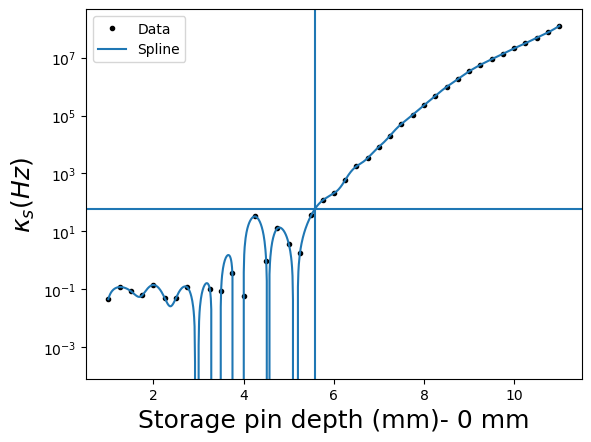

In [61]:
x = np.array(Variable)-offset
y = np.array(F2/Q2*10**9) # Hz
y = y-min(y)
target = 60 # Hz

ind = np.lexsort((y,x))
x = x[ind]
y = y[ind]

spl = InterpolatedUnivariateSpline(x,y)
xs = np.linspace(min(x), max(x), 1000)


plt.plot(x,y,'k.', label = 'Data')
plt.plot(xs, spl(xs), label = 'Spline')
plt.legend()


ys = spl(xs)
ind = np.argmin((ys - 1.00)**2)
xbest = xs[ind]

spl2 = UnivariateSpline(x, y - target, s=0)
xbest = spl2.roots()[-1]
plt.axvline(xbest)
plt.axhline(spl(xbest))

plt.xlabel('Storage pin depth (mm)- %s mm'% offset,fontsize = fontsize)
plt.ylabel(r'$\kappa_{s} (Hz)$',fontsize=fontsize)
print(xbest)
plt.yscale('log')
plt.show()

1.4253283894496647


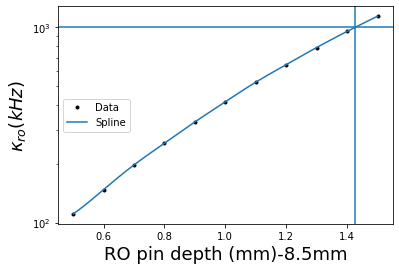

In [47]:
ROpin1, ROpin2 = np.array(ROpin1), np.array(ROpin2)
F2 = np.array(Fs)[:,1][ROpin1==1]
Q2 = np.array(Qs)[:,1][ROpin1==1]

x = np.array(ROpin2[ROpin1==1])-8.5
y = np.array(F2/Q2*10**6) # kHz

ind = np.lexsort((y,x))
x = x[ind]
y = y[ind]

spl = InterpolatedUnivariateSpline(x,y)
xs = np.linspace(min(x), max(x), 1000)
plt.semilogy(x,y,'k.', label = 'Data')
plt.semilogy(xs, spl(xs), label = 'Spline')
plt.legend()

ys = spl(xs)
ind = np.argmin((ys - 1.00)**2)
xbest = xs[ind]
# plt.axvline(xbest)
# plt.axhline(1)
# print(xbest)

spl2 = UnivariateSpline(x, y - 1000, s=0)
xbest = spl2.roots()[0]
plt.axvline(xbest)
plt.axhline(spl(xbest))

plt.xlabel('RO pin depth (mm)-8.5mm',fontsize = fontsize)
plt.ylabel(r'$\kappa_{ro} (kHz)$',fontsize=fontsize)
print(xbest)

In [69]:
temp = eprh.get_ansys_variables()
d = np.array([Qs[:,1],Fs[:,1]])
index = ['RO_Q','F_RO (GHz)']
df = pd.DataFrame(data=d, columns = temp.columns, index= index)
result = temp.append(df)
result.to_csv('Gen4_external_decay_rate_all_parameters.csv')

In [127]:
np.sort(Fs[:,2]*1e3/Qs[:,2])

array([0.00600367, 0.00602312, 0.00604816, 0.00610432, 0.00611833,
       0.00612345, 0.00613089, 0.00614678, 0.00617918, 0.00618845,
       0.00662549, 0.00755131, 0.01201453, 0.02959563, 0.08469234,
       0.21681204, 0.48088198, 0.98912024, 1.79490089])

Text(0.5, 0, 'Pin_depth (mm)')

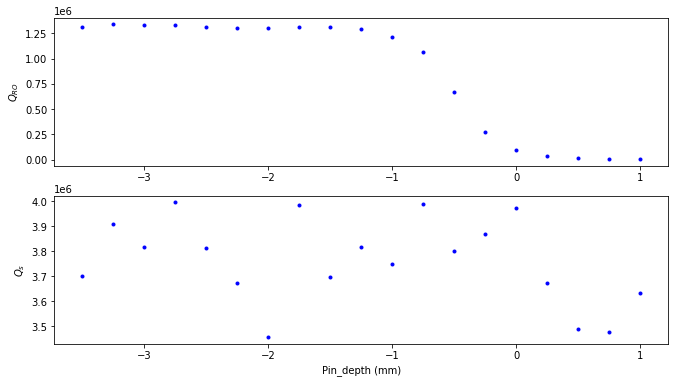

In [99]:
Fs = np.array(Fs)
Qs = np.array(Qs)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11,6))
ax1.plot(np.array(ROpin2)-8.5,Qs[:,2],'b.')
ax1.set_ylabel(r'$Q_{RO}$')
ax2.plot(np.array(ROpin2)-8.5,Qs[:,1],'b.')
ax2.set_ylabel(r'$Q_s$')
plt.xlabel('Pin_depth (mm)')

The Q is infinite, since we have not included dissipation yet in this example. The row index is the mode number

####  Full analysis

Let's now jump ahead to the full analysis.

##### Getting more info

In general, to see more info when running commands , set the logger level

In [ ]:
import logging
epr.logger.setLevel(logging.DEBUG)

## <div style="background:#BBFABB;line-height:2em;"> Quantum Hamiltonian Analysis:<br> Load mw-analysis results and perform hamiltonian analysis on the solutions  <div>

We will now postprocess the mw analysis to obtain the quantum Hamiltonian. 

The code object of postprocessing is `epra`, an instance of `epr.QuantumAnalysis`.

In [ ]:
%matplotlib inline
# plot the figures in the notebook. 

# This is the core object for working with post processing data from HFSS
# This iwll load the saved solutions from above
# file = r'C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen3\2022-01-18 11-26-20.npz'
epra = epr.QuantumAnalysis(eprh.data_filename)

# Analyze 
result = epra.analyze_all_variations(cos_trunc = 8, fock_trunc = 4)

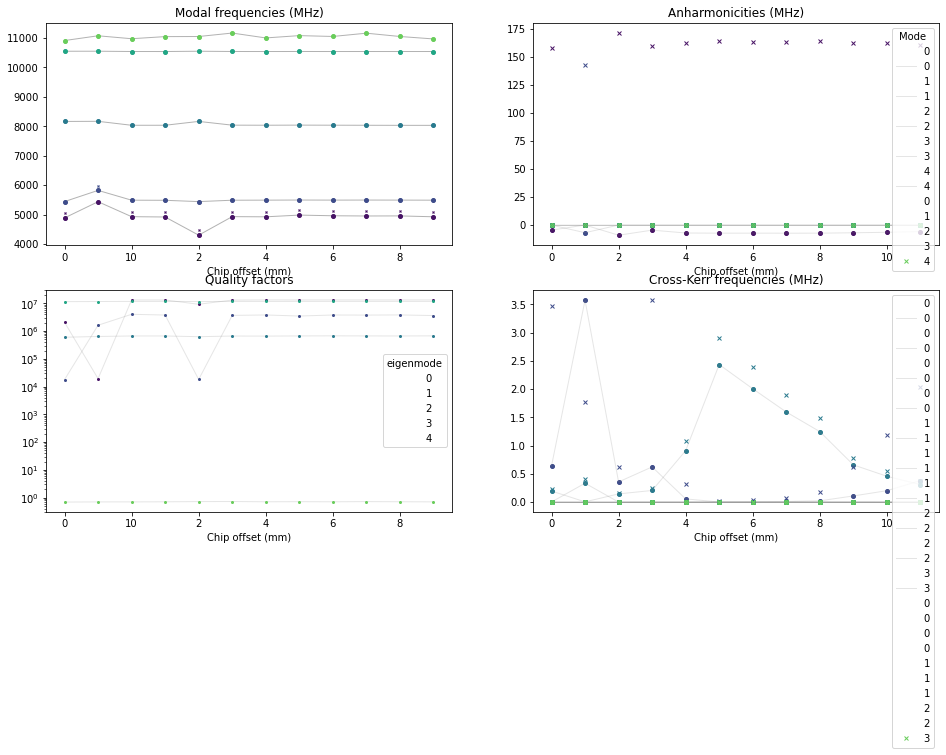

In [38]:
epra.plot_hamiltonian_results(x_label = 'Chip offset (mm)');

In [46]:
np.array(result['1']['chi_O1'])[1,1]

142.2902780398406

In [82]:
result['1'].keys()

odict_keys(['f_0', 'f_1', 'f_ND', 'chi_O1', 'chi_ND', 'ZPF', 'Pm_normed', 'Pm_raw', '_Pm_norm', '_Pm_cap_norm', 'hfss_variables', 'Ljs', 'Cjs', 'Q_coupling', 'Qs', 'fock_trunc', 'cos_trunc'])

In [84]:
result['1']['f_0'][0]

5439.2715886999995

In [94]:
RO_dis = []
St_dis = []
Anaha = []
C = []
for i in range(3,12):
    chi = np.array(result[str(i)]['chi_O1'])
    St_dis.append(chi[0,1])
    RO_dis.append(chi[0,2])
    Anaha.append(chi[0,0])
    C.append(10**6/(2*np.pi)**2/(np.array(result[str(i)]['f_0'])[0]/1000)**2/10)

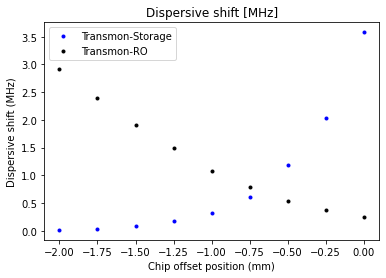

In [57]:
dist = np.array([0,-1,-2,-1.75,-1.5,-1.25,-0.75,-0.5,-0.25])
plt.title('Dispersive shift [MHz]')
plt.plot(dist, St_dis, 'b.',label = 'Transmon-Storage')
plt.plot(dist, RO_dis, 'k.', label = 'Transmon-RO')
plt.xlabel('Chip offset position (mm)')
plt.ylabel('Dispersive shift (MHz)')
plt.legend()

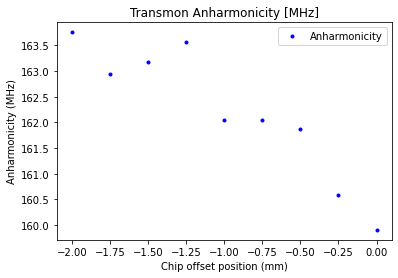

In [58]:
dist = np.array([0,-1,-2,-1.75,-1.5,-1.25,-0.75,-0.5,-0.25])
plt.title('Transmon Anharmonicity [MHz]')
plt.plot(dist, Anaha, 'b.',label = 'Anharmonicity')
plt.xlabel('Chip offset position (mm)')
plt.ylabel('Anharmonicity (MHz)')
plt.legend()

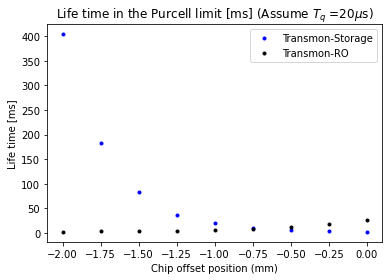

In [77]:
plt.title(r'Life time in the Purcell limit [ms] (Assume $T_q$ =20$\mu$s)')
plt.plot(dist, 2*np.array(Anaha)/np.array(St_dis)*20/1000, 'b.',label = 'Transmon-Storage')
plt.plot(dist, 2*np.array(Anaha)/np.array(RO_dis)*20/1000, 'k.', label = 'Transmon-RO')
plt.xlabel('Chip offset position (mm)')
plt.ylabel(r'Life time [ms]')
plt.legend()

In [69]:
T_pSt = 2*np.array(Anaha)/np.array(St_dis)*20/1000
T_pRO = 2*np.array(Anaha)/np.array(RO_dis)*20/1000

In [97]:
Lj = 10*np.ones(len(T_pSt))
C = np.array(C)
EJ = Convert.Ej_from_Lj(Lj, 'nH', "GHz")
EC = Convert.Ec_from_Cs(C, 'fF', "MHz")

In [104]:
d = {'dist': dist, 'LJ [nH]':10*np.ones(len(T_pSt)),'C [fF]':C, 'EJ [GHz]':EJ, 'EC [MHz]':EC, 'EJ/EC':EJ/EC*1000, 'Alpha [MHz]':Anaha, 'Chi_RO [MHz]':RO_dis, 'Chi_Storage [MHz]':St_dis,'Purcell_Storage [ms]': T_pSt, 'Purcell_RO [ms]': T_pRO}
pf = pd.DataFrame(data = d)

In [105]:
pf

dist  LJ [nH]     C [fF]   EJ [GHz]    EC [MHz]      EJ/EC  Alpha [MHz]  \
0  0.00     10.0  97.715016  16.346151  198.231860  82.459758   159.903635   
1 -1.00     10.0  97.939267  16.346151  197.777970  82.648999   162.039276   
2 -2.00     10.0  95.631664  16.346151  202.550375  80.701659   163.758472   
3 -1.75     10.0  96.518820  16.346151  200.688625  81.450313   162.945506   
4 -1.50     10.0  96.807451  16.346151  200.090274  81.693882   163.170557   
5 -1.25     10.0  96.695714  16.346151  200.321488  81.599590   163.565460   
6 -0.75     10.0  97.888286  16.346151  197.880974  82.605977   162.045834   
7 -0.50     10.0  97.736924  16.346151  198.187425  82.478247   161.879485   
8 -0.25     10.0  98.196327  16.346151  197.260222  82.865928   160.575943   

   Chi_RO [MHz]  Chi_Storage [MHz]  Purcell_Storage [ms]  Purcell_RO [ms]  
0      0.243418           3.581067              1.786100        26.276335  
1      1.085056           0.312577             20.735941         5.973491  
2      2.914580           0.016200            404.347701         2.247438  
3      2.397080           0.035757            182.279359         2.719066  
4      1.905263           0.077918             83.765339         3.425681  
5      1.491759           0.175800             37.216161         4.385841  
6      0.784716           0.615798             10.525903         8.260102  
7      0.544133           1.179948              5.487682        11.900003  
8      0.366715           2.033134              3.159180        17.515077

In [ ]:
temp = np.zeros([len(result.keys()),4])
for i in result.keys():
    result['1']

In [ ]:
temp = result['1']
np.array(temp['f_0'])

## <div style="background:#BBFABB;line-height:2em;"> Swept variable analysis driven thorugh pyEPR:<br> Sweep variable in hfss, analyze microwaves, then analyze quantum<div>

Let us now run a more complicated example, where we will sweep $L_j$. This demonstrates some of the `pyEPR` funcationality. 

**Classical microwave, distributed analysis**

Sweep variable in HFSS, run circuits

**EPR mw analysis**

Classical-to-quantum bridge. 

In [ ]:
eprh = epr.DistributedAnalysis(pinfo) # epr hfss analysis 
eprh.hfss_report_full_convergence()

In [ ]:
# Do EPR analysis for all modes and all variations 
eprh.do_EPR_analysis();

**Quantum analysis** 

Perform the analysis and plot the results.

In [ ]:
# This is the core object for working with post processing data from HFSS
# This will load the saved solutions from above
epra = epr.QuantumAnalysis(eprh.data_filename)

In [ ]:
# Analyze 
epra.analyze_all_variations(cos_trunc = 8, fock_trunc = 15);

In [ ]:
#Custom sort of columns
def do_sort_index(df:pd.DataFrame):
    if isinstance(df, pd.DataFrame):
        df.columns = df.columns.astype(float)
        return df.sort_index(axis=1)
    else:
        return df

epra.results.do_sort_index = do_sort_index
df = epra.results.get_frequencies_HFSS(vs='Lj_1')
df

In [ ]:
epra.results.sort_index = True
epra.plot_hamiltonian_results(swp_variable='Lj_1');

There is some jitter, since we have have run some of the runs to only a few passes here.

Please see Part II of the tutorial to continue. You will find it in the tutorial folder as a jupyter notebook. 

In [ ]:
epra.quick_plot_mode(0,0,1,numeric=True,swp_variable='Lj_1')

In [ ]:
swp_variable = 'Lj_1'
epra.report_results(swp_variable=swp_variable, numeric=True)